# Introduction

Time-series problem experimenting in ways to forecast the price of Bitcoin.

In [1]:
# Importing the helper_functions file
import os

if not os.path.exists('helper_functions.py'):
  !wget https://raw.githubusercontent.com/DavAll22/Extra-Code/main/helper_functions_TF.py
else:
  print("[INFO] 'helper_functions_TF.py' already exists, skipping download.")


--2023-06-15 07:07:16--  https://raw.githubusercontent.com/DavAll22/Extra-Code/main/helper_functions_TF.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13751 (13K) [text/plain]
Saving to: ‘helper_functions_TF.py’

helper_functions_TF 100%[===================>]  13.43K  --.-KB/s    in 0s      

2023-06-15 07:07:16 (99.3 MB/s) - ‘helper_functions_TF.py’ saved [13751/13751]



# Getting the data

Data retrieved from https://coincodex.com/crypto/bitcoin/historical-data/ on 14/06/23

In [2]:
# Download Bitcoin historical data from GitHub
!wget 'https://raw.githubusercontent.com/DavAll22/Bitcoin_Forecast/main/bitcoin_2013-10-01_2023-06-14.csv'

--2023-06-15 07:07:16--  https://raw.githubusercontent.com/DavAll22/Bitcoin_Forecast/main/bitcoin_2013-10-01_2023-06-14.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 339343 (331K) [text/plain]
Saving to: ‘bitcoin_2013-10-01_2023-06-14.csv’

bitcoin_2013-10-01_ 100%[===================>] 331.39K  --.-KB/s    in 0.01s   

2023-06-15 07:07:16 (22.4 MB/s) - ‘bitcoin_2013-10-01_2023-06-14.csv’ saved [339343/339343]



In [3]:
import pandas as pd
df = pd.read_csv('/content/bitcoin_2013-10-01_2023-06-14.csv')


df.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,Jun-12-2023,25910.04,26300.08,25760.04,25910.03,3.377094e+10,5.042019e+11
1,Jun-11-2023,25922.89,26081.61,25662.95,25887.59,3.018877e+10,5.018320e+11
2,Jun-10-2023,25820.23,26147.84,25676.59,25920.86,3.299485e+10,5.011299e+11
3,Jun-09-2023,26481.47,26500.50,25491.91,25842.84,3.586479e+10,5.009359e+11
4,Jun-08-2023,26509.38,26766.28,26325.91,26489.46,2.879870e+10,5.143227e+11


In [4]:
# Re-formatting to import using datetime:
df = pd.read_csv('/content/bitcoin_2013-10-01_2023-06-14.csv',
                 parse_dates=['Date'],
                 index_col=['Date']) # parse the date column (column 1 is a datetime)
df.head()


,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2023-06-12,25910.04,26300.08,25760.04,25910.03,3.377094e+10,5.042019e+11
2023-06-11,25922.89,26081.61,25662.95,25887.59,3.018877e+10,5.018320e+11
2023-06-10,25820.23,26147.84,25676.59,25920.86,3.299485e+10,5.011299e+11
2023-06-09,26481.47,26500.50,25491.91,25842.84,3.586479e+10,5.009359e+11
2023-06-08,26509.38,26766.28,26325.91,26489.46,2.879870e+10,5.143227e+11


In [5]:
# Sorting dataframe from earliest date first
df.sort_values(by='Date', ascending = True, inplace = True)
df[:10], df[-10:]

(              Open    High     Low   Close  Volume    Market Cap
 Date                                                            
 2013-09-30  132.68  134.63  131.55  132.18     0.0  1.567875e+09
 2013-10-01  132.05  133.59  102.25  114.13     0.0  1.501799e+09
 2013-10-02  114.45  123.63  111.82  123.63     0.0  1.412675e+09
 2013-10-03  123.41  130.09  123.41  129.01     0.0  1.500255e+09
 2013-10-04  128.63  130.44  128.03  128.55     0.0  1.522529e+09
 2013-10-05  128.36  129.66  126.15  129.00     0.0  1.511180e+09
 2013-10-06  129.43  130.27  126.36  126.94     0.0  1.518677e+09
 2013-10-07  126.74  127.47  124.71  126.00     0.0  1.487193e+09
 2013-10-08  125.85  131.75  125.58  130.69     0.0  1.524165e+09
 2013-10-09  130.67  131.50  129.26  130.59     0.0  1.542156e+09,
                 Open      High       Low     Close        Volume    Market Cap
 Date                                                                          
 2023-06-03  27063.05  27384.43  26978.50  2710

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3543 entries, 2013-09-30 to 2023-06-12
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Open        3543 non-null   float64
 1   High        3543 non-null   float64
 2   Low         3543 non-null   float64
 3   Close       3543 non-null   float64
 4   Volume      3543 non-null   float64
 5   Market Cap  3543 non-null   float64
dtypes: float64(6)
memory usage: 193.8 KB


In [7]:
len(df)

3543

In [8]:
# Only want the closing price per day
bitcoin_prices = pd.DataFrame(df['Close']).rename(columns={'Close': 'Price (USD)'})
bitcoin_prices.head()

,Price (USD)
Date,
2013-09-30,132.18
2013-10-01,114.13
2013-10-02,123.63
2013-10-03,129.01
2013-10-04,128.55


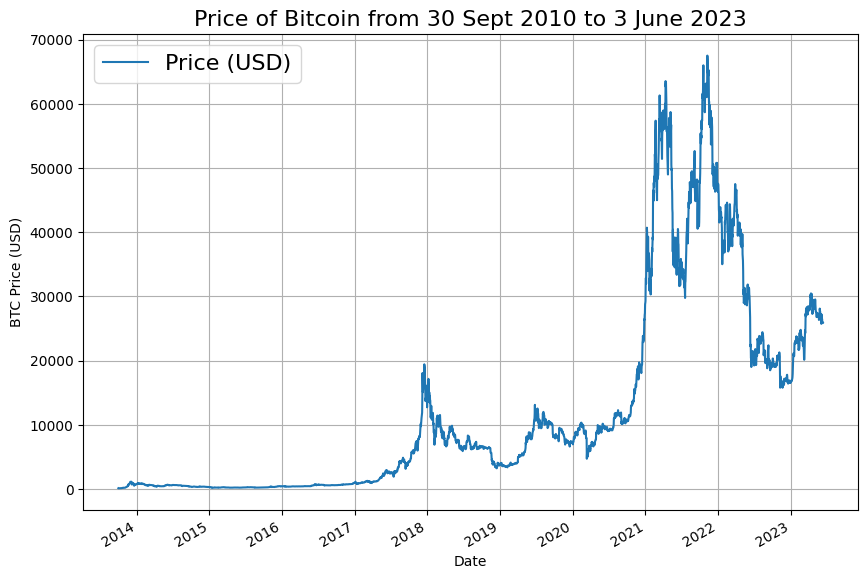

In [9]:
import matplotlib.pyplot as plt
bitcoin_prices.plot(figsize=(10, 7))
plt.ylabel('BTC Price (USD)')
plt.title('Price of Bitcoin from 30 Sept 2010 to 3 June 2023', fontsize=16)
plt.grid(True)
plt.legend(fontsize=16);

# Creating dataset splits

Not splitting with random points within the whole timeseries - we want to predict future values (forecasting).

We will split the data at a set interval in time; the values before the split are the training set (past data), values after the split are the test set (future data for validation).

In [10]:
# Get bitcoin data array
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices['Price (USD)'].to_numpy()

timesteps[:10], prices[:10]

(array(['2013-09-30T00:00:00.000000000', '2013-10-01T00:00:00.000000000',
        '2013-10-02T00:00:00.000000000', '2013-10-03T00:00:00.000000000',
        '2013-10-04T00:00:00.000000000', '2013-10-05T00:00:00.000000000',
        '2013-10-06T00:00:00.000000000', '2013-10-07T00:00:00.000000000',
        '2013-10-08T00:00:00.000000000', '2013-10-09T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([132.18, 114.13, 123.63, 129.01, 128.55, 129.  , 126.94, 126.  ,
        130.69, 130.59]))

In [11]:
# Creating train and test splits
split_size = int(0.8*len(prices)) # 80% train, 20% test

# Creating training data
X_train, y_train = timesteps[:split_size], prices[:split_size]

# Creating test data
X_test, y_test = timesteps[split_size:], prices[split_size:]

len(X_train), len(X_test), len(y_train), len(y_test)

(2834, 709, 2834, 709)

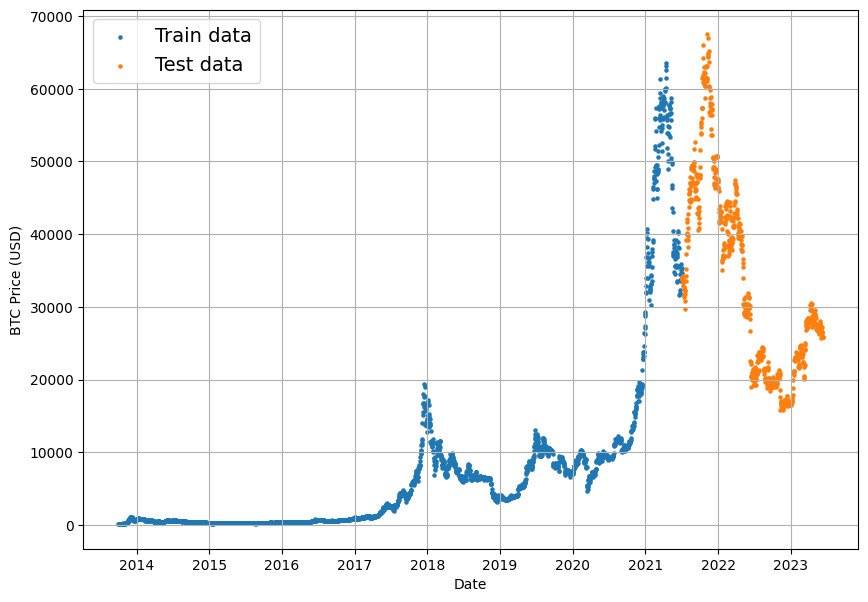

In [12]:
# Visualise the splits
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label='Train data')
plt.scatter(X_test, y_test, s=5, label='Test data')
plt.xlabel('Date')
plt.ylabel('BTC Price (USD)')
plt.legend(fontsize=14)
plt.grid(True)
plt.show()

In [13]:
# Plotting function
def plot_time_series(timesteps, values, format='.', start=0, end=None, label=None):
  """
  Plots timesteps (a series of points in time) against values (a series of values across timesteps)

  Parameters
  ---------
  timesteps : array of timesteps
  values : array of values across time
  format : style of plot, default "."
  start : where to start the plot (setting a value will index from the start of tiemsteps and values)
  end : ehere to end the plot (setting a value will index from end of timesteps and values)
  label : label to show on plot of values
  """
  # Plot the series
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel('Time')
  plt.ylabel('BTC Price (USD)')
  if label:
    plt.legend(fontsize=14) # make label bigger
  plt.grid(True)

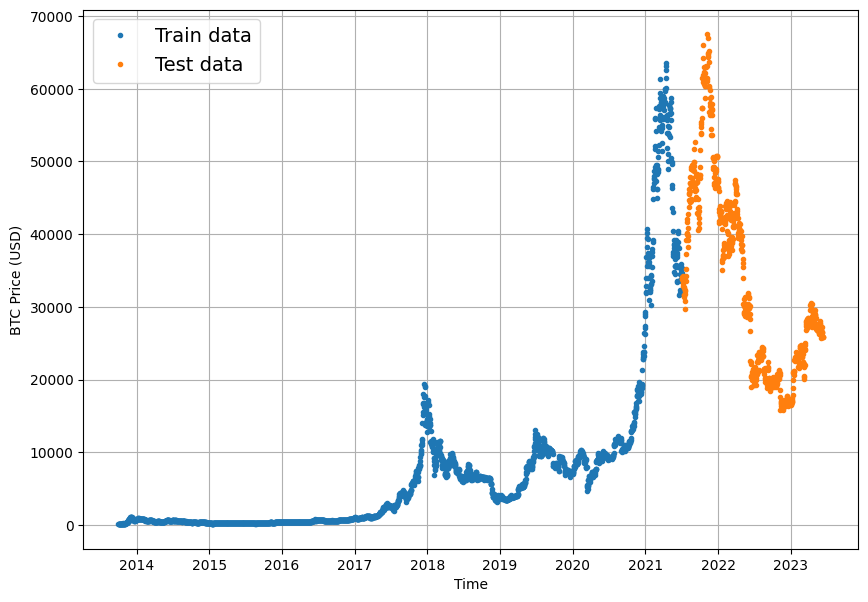

In [14]:
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label='Train data')
plot_time_series(timesteps=X_test, values=y_test, label='Test data')

# Baseline model: Naive Forecast

Requires no training at all as it uses the previous timestep value to predict the next timestep value.
Open systems, like stock markets, are very hard to beat with *any* model.

In [15]:
naive_forecast = y_test[:-1] # every value excluding the last value
naive_forecast[:10], naive_forecast[-10:]

(array([33866.54474974, 34106.80638065, 33867.46512423, 32837.96027303,
        33866.19638188, 33548.81732713, 34249.77403858, 33219.35200045,
        32567.57251463, 32776.13963032]),
 array([27060.8 , 27104.41, 25730.52, 27200.04, 26359.59, 26493.46,
        26489.46, 25842.84, 25920.86, 25887.59]))

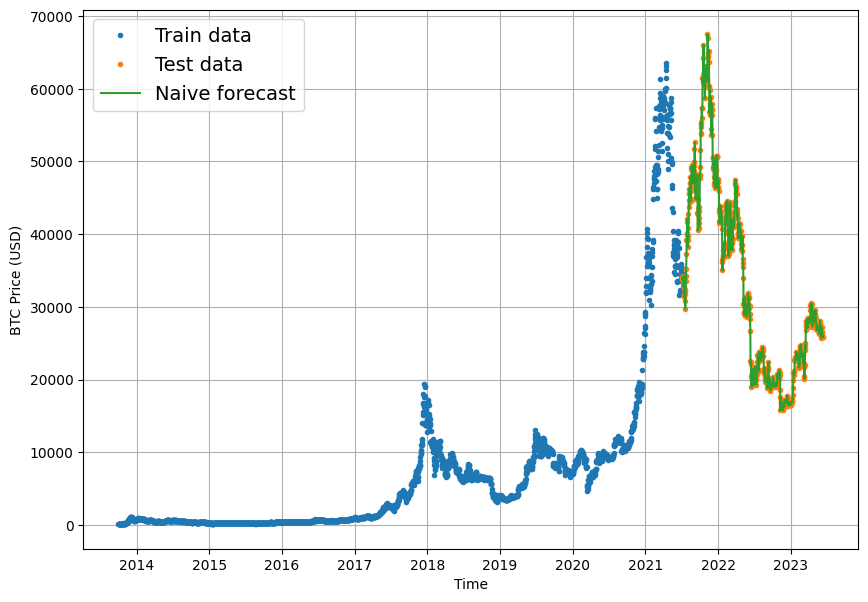

In [16]:
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label='Train data')
plot_time_series(timesteps=X_test, values=y_test, label='Test data')
plot_time_series(timesteps=X_test[1:], values=naive_forecast, format='-', label='Naive forecast')

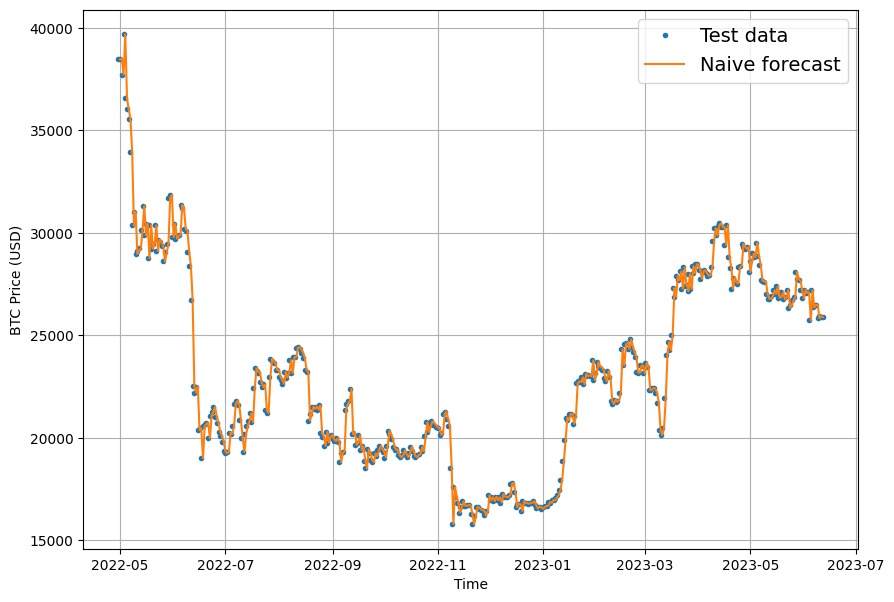

In [17]:
# Zoom in to view the results using an offset parameter to start at index value
plt.figure(figsize=(10, 7))
offset = 300
plot_time_series(timesteps=X_test, values=y_test, start=offset, label='Test data')
plot_time_series(timesteps=X_test[1:], values=naive_forecast, start=offset, format='-', label='Naive forecast')

Naive forecast comes slightly after the test data - uses previous timestep value to predict the next value

## Evaluation

Regression problem (predicting a price), so use regression metrics

* MAE - Mean Absolute Error
* RMSE - Root Mean Square Error
* MAPE - Mean Absolute Percentage Error
* sMAPE - Symmetric Mean Absoute Percentage Error
* MASE = Mean Absolute Scaled Error

In [18]:
import tensorflow as tf

In [19]:
# MASE implementation from user sktime
def mean_absolute_scaled_error(y_true, y_pred):
  """
  Implement MASE (assuming noi seasonality of data)
  """
  mae = tf.reduce_mean(tf.abs(y_true - y_pred))

  # Find MAE of naive forecast
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1])) # seasonality is 1 day

  return mae / mae_naive_no_season

In [20]:
# Function for calulating all metrics
def evaluate_preds(y_true, y_pred):
  # Ensure in float32 for metric caluclations
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  return{'mae': mae.numpy(),
         'mse': mse.numpy(),
         'rmse': rmse.numpy(),
         'mape': mape.numpy(),
         'mase': mase.numpy()}

In [21]:
naive_results = evaluate_preds(y_true=y_test[1:],
                               y_pred=naive_forecast)
naive_results

{'mae': 767.5714,
 'mse': 1358397.4,
 'rmse': 1165.503,
 'mape': 2.2606952,
 'mase': 0.9990292}

In [22]:
# average bitcoin price in test data
tf.reduce_mean(y_test).numpy()

32827.64452697476

# Windowing the datasets

Use windows of the past data to predict a future value/values.

The dataset currently is univariate (using one varible - price of bitcoin to predict price of bitcoin)

In [23]:
import numpy as np
# Window and Horizon creation for 1 week of prices
HORIZON = 1 # predict 1 step at a time
WINDOW_SIZE = 7 # use 7 past timesteps to predict the horizon

In [24]:
# Function to label windowed data
def get_labelled_windows(x, horizon=1):
  """
  Creates labels for windowed dataset.

  E.g. if horizon = 1 (default)
  Input: [1, 2, 3, 4, 5, 6] -> Output: ([1, 2, 3, 4, 5], [6])
  """
  return x[:, :-horizon], x[:, -horizon:]

In [25]:
# Testing the function
test_window, test_label = get_labelled_windows(tf.expand_dims(tf.range(8)+1, axis=0), horizon=HORIZON)
print(f'Window: {tf.squeeze(test_window).numpy()} -> Label: {tf.squeeze(test_label).numpy()}')

Window: [1 2 3 4 5 6 7] -> Label: 8


In [26]:
# Function to make windows for whole time series data using numpy array indexing
def make_windows(x, window_size=7, horizon=1):
  """
  Turns a 1D array into a 2D array of sequential windows of window_size.
  """
  # 1. Create a window of specific window_size (add horizon on the end for later labelling)
  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)

  # 2. Create 2D array of multiple window steps (minus 1 to account for 0 indexing)
  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T

  # 3. Index on target array (time series) with 2D array of multiple window steps
  windowed_array = x[window_indexes]

  # 4. Get the lebeleld windows
  windows, labels = get_labelled_windows(windowed_array, horizon=horizon)

  return windows, labels

In [27]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(3536, 3536)

In [28]:
# View first 3 windows/labels
for i in range(3):
  print(f'Window: {full_windows[i]} -> Label: {full_labels[i]}')

Window: [132.18 114.13 123.63 129.01 128.55 129.   126.94] -> Label: [126.]
Window: [114.13 123.63 129.01 128.55 129.   126.94 126.  ] -> Label: [130.69]
Window: [123.63 129.01 128.55 129.   126.94 126.   130.69] -> Label: [130.59]


In [29]:
# View last 3 windows/labels
for i in range(3):
  print(f'Window: {full_windows[i-3]} -> Label: {full_labels[i-3]}')

Window: [27104.41 25730.52 27200.04 26359.59 26493.46 26489.46 25842.84] -> Label: [25920.86]
Window: [25730.52 27200.04 26359.59 26493.46 26489.46 25842.84 25920.86] -> Label: [25887.59]
Window: [27200.04 26359.59 26493.46 26489.46 25842.84 25920.86 25887.59] -> Label: [25910.03]


## Making dataset splits

In [30]:
def make_train_test_splits(windows, labels, test_split=0.2):
  """
  Splits matching pairs of windows and labels into train and test splits
  """
  split_size = int(len(windows) * (1-test_split)) # defaults to 80% train, 20% test
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]

  return train_windows, test_windows, train_labels, test_labels

In [31]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2828, 708, 2828, 708)

In [32]:
train_windows[:5], train_labels[:5]

(array([[132.18, 114.13, 123.63, 129.01, 128.55, 129.  , 126.94],
        [114.13, 123.63, 129.01, 128.55, 129.  , 126.94, 126.  ],
        [123.63, 129.01, 128.55, 129.  , 126.94, 126.  , 130.69],
        [129.01, 128.55, 129.  , 126.94, 126.  , 130.69, 130.59],
        [128.55, 129.  , 126.94, 126.  , 130.69, 130.59, 130.9 ]]),
 array([[126.  ],
        [130.69],
        [130.59],
        [130.9 ],
        [135.19]]))

# Model checkpoints

In [33]:
import os

def create_model_checkpoint(model_name, save_path='model_experiments'):
  return tf.keras.callbacks.ModelCheckpoint(filepath = os.path.join(save_path, model_name),
                                            verbose=0,
                                            save_best_only=True) # save only the best model to file

# 1. Model 1: Dense (Window = 7, Horizon = 1)

In [34]:
import tensorflow as tf
from tensorflow.keras import layers

tf.random.set_seed(42)

# Model
model_1 = tf.keras.Sequential([
    layers.Dense(128, activation='relu'),
    layers.Dense(HORIZON, activation='linear') # same as having no activation
], name='model_1_dense')

model_1.compile(loss='mae',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae'])

# Fit the model
model_1_history = model_1.fit(x=train_windows,
                              y=train_labels,
                              epochs=100,
                              verbose=1,
                              batch_size=128,
                              validation_data=(test_windows, test_labels),
                              callbacks=[create_model_checkpoint(model_name=model_1.name)])

Epoch 1/100
22/23 [===========================>..] - ETA: 0s - loss: 3661.3594 - mae: 3661.3594

23/23 [==============================] - 10s 63ms/step - loss: 3647.2200 - mae: 3647.2200 - val_loss: 4853.3755 - val_mae: 4853.3755
Epoch 2/100
19/23 [=======================>......] - ETA: 0s - loss: 758.2801 - mae: 758.2801

23/23 [==============================] - 2s 96ms/step - loss: 754.1197 - mae: 754.1197 - val_loss: 1504.1381 - val_mae: 1504.1381
Epoch 3/100
12/23 [==============>...............] - ETA: 0s - loss: 491.2505 - mae: 491.2505

23/23 [==============================] - 1s 51ms/step - loss: 476.7828 - mae: 476.7828 - val_loss: 1380.3439 - val_mae: 1380.3439
Epoch 4/100
19/23 [=======================>......] - ETA: 0s - loss: 385.7057 - mae: 385.7057

23/23 [==============================] - 1s 54ms/step - loss: 383.9211 - mae: 383.9211 - val_loss: 1259.8066 - val_mae: 1259.8066
Epoch 5/100
23/23 [==============================] - 0s 8ms/step - loss: 366.1846 - mae: 366.1846 - val_loss: 1264.3386 - val_mae: 1264.3386
Epoch 6/100
14/23 [=================>............] - ETA: 0s - loss: 353.5588 - mae: 353.5588

23/23 [==============================] - 2s 68ms/step - loss: 357.0805 - mae: 357.0805 - val_loss: 1171.2317 - val_mae: 1171.2317
Epoch 7/100
23/23 [==============================] - 1s 26ms/step - loss: 344.1139 - mae: 344.1139 - val_loss: 1300.5677 - val_mae: 1300.5677
Epoch 8/100
21/23 [==========================>...] - ETA: 0s - loss: 331.8016 - mae: 331.8016

23/23 [==============================] - 2s 92ms/step - loss: 333.1958 - mae: 333.1958 - val_loss: 1090.7452 - val_mae: 1090.7452
Epoch 9/100
23/23 [==============================] - 0s 10ms/step - loss: 316.4617 - mae: 316.4617 - val_loss: 1310.7074 - val_mae: 1310.7074
Epoch 10/100
16/23 [===================>..........] - ETA: 0s - loss: 342.5558 - mae: 342.5558

23/23 [==============================] - 1s 46ms/step - loss: 332.7564 - mae: 332.7564 - val_loss: 1074.4921 - val_mae: 1074.4921
Epoch 11/100
18/23 [======================>.......] - ETA: 0s - loss: 312.3492 - mae: 312.3492

23/23 [==============================] - 1s 51ms/step - loss: 307.2534 - mae: 307.2534 - val_loss: 1026.2491 - val_mae: 1026.2491
Epoch 12/100
22/23 [===========================>..] - ETA: 0s - loss: 300.9663 - mae: 300.9663

23/23 [==============================] - 1s 48ms/step - loss: 300.4578 - mae: 300.4578 - val_loss: 1000.8694 - val_mae: 1000.8694
Epoch 13/100
23/23 [==============================] - 0s 11ms/step - loss: 297.9418 - mae: 297.9418 - val_loss: 1082.8367 - val_mae: 1082.8367
Epoch 14/100
23/23 [==============================] - 0s 12ms/step - loss: 290.9451 - mae: 290.9451 - val_loss: 1060.3214 - val_mae: 1060.3214
Epoch 15/100
21/23 [==========================>...] - ETA: 0s - loss: 309.2738 - mae: 309.2738

23/23 [==============================] - 1s 28ms/step - loss: 306.8326 - mae: 306.8326 - val_loss: 998.7543 - val_mae: 998.7543
Epoch 16/100
19/23 [=======================>......] - ETA: 0s - loss: 280.7338 - mae: 280.7338

23/23 [==============================] - 1s 25ms/step - loss: 281.2554 - mae: 281.2554 - val_loss: 998.4134 - val_mae: 998.4134
Epoch 17/100
23/23 [==============================] - 0s 5ms/step - loss: 273.6392 - mae: 273.6392 - val_loss: 1237.6595 - val_mae: 1237.6595
Epoch 18/100
23/23 [==============================] - 0s 6ms/step - loss: 280.0674 - mae: 280.0674 - val_loss: 1114.7526 - val_mae: 1114.7526
Epoch 19/100
18/23 [======================>.......] - ETA: 0s - loss: 273.2569 - mae: 273.2569

23/23 [==============================] - 1s 25ms/step - loss: 272.0864 - mae: 272.0864 - val_loss: 936.3095 - val_mae: 936.3095
Epoch 20/100
18/23 [======================>.......] - ETA: 0s - loss: 278.5473 - mae: 278.5473

23/23 [==============================] - 1s 25ms/step - loss: 281.0301 - mae: 281.0301 - val_loss: 922.7131 - val_mae: 922.7131
Epoch 21/100
23/23 [==============================] - 0s 5ms/step - loss: 270.4810 - mae: 270.4810 - val_loss: 923.0825 - val_mae: 923.0825
Epoch 22/100
19/23 [=======================>......] - ETA: 0s - loss: 260.8274 - mae: 260.8274

23/23 [==============================] - 1s 25ms/step - loss: 262.0233 - mae: 262.0233 - val_loss: 911.7791 - val_mae: 911.7791
Epoch 23/100
23/23 [==============================] - 0s 5ms/step - loss: 258.7458 - mae: 258.7458 - val_loss: 1047.8466 - val_mae: 1047.8466
Epoch 24/100
23/23 [==============================] - 0s 5ms/step - loss: 282.0291 - mae: 282.0291 - val_loss: 1444.4586 - val_mae: 1444.4586
Epoch 25/100
18/23 [======================>.......] - ETA: 0s - loss: 301.1649 - mae: 301.1649

23/23 [==============================] - 1s 26ms/step - loss: 286.1304 - mae: 286.1304 - val_loss: 899.3438 - val_mae: 899.3438
Epoch 26/100
23/23 [==============================] - 0s 5ms/step - loss: 251.5873 - mae: 251.5873 - val_loss: 903.7941 - val_mae: 903.7941
Epoch 27/100
23/23 [==============================] - 0s 5ms/step - loss: 263.5440 - mae: 263.5440 - val_loss: 1054.6781 - val_mae: 1054.6781
Epoch 28/100
23/23 [==============================] - 0s 5ms/step - loss: 278.3459 - mae: 278.3459 - val_loss: 1059.5751 - val_mae: 1059.5751
Epoch 29/100
23/23 [==============================] - 0s 5ms/step - loss: 288.5629 - mae: 288.5629 - val_loss: 1041.5909 - val_mae: 1041.5909
Epoch 30/100
19/23 [=======================>......] - ETA: 0s - loss: 270.4109 - mae: 270.4109

23/23 [==============================] - 1s 37ms/step - loss: 272.1660 - mae: 272.1660 - val_loss: 880.1047 - val_mae: 880.1047
Epoch 31/100
23/23 [==============================] - 0s 5ms/step - loss: 267.1963 - mae: 267.1963 - val_loss: 921.2994 - val_mae: 921.2994
Epoch 32/100
23/23 [==============================] - 0s 9ms/step - loss: 248.7044 - mae: 248.7044 - val_loss: 994.4211 - val_mae: 994.4211
Epoch 33/100
23/23 [==============================] - 0s 9ms/step - loss: 249.1948 - mae: 249.1948 - val_loss: 883.4332 - val_mae: 883.4332
Epoch 34/100
23/23 [==============================] - 0s 7ms/step - loss: 244.4054 - mae: 244.4054 - val_loss: 966.5016 - val_mae: 966.5016
Epoch 35/100
23/23 [==============================] - 0s 8ms/step - loss: 261.6214 - mae: 261.6214 - val_loss: 906.6298 - val_mae: 906.6298
Epoch 36/100
23/23 [==============================] - 0s 7ms/step - loss: 262.8607 - mae: 262.8607 - val_loss: 911.4128 - val_mae: 911.4128
Epoch 37/100
13/23 [============

23/23 [==============================] - 1s 36ms/step - loss: 249.2570 - mae: 249.2570 - val_loss: 867.9982 - val_mae: 867.9982
Epoch 38/100
23/23 [==============================] - 0s 8ms/step - loss: 243.5905 - mae: 243.5905 - val_loss: 872.4819 - val_mae: 872.4819
Epoch 39/100
23/23 [==============================] - 0s 8ms/step - loss: 252.7839 - mae: 252.7839 - val_loss: 920.4802 - val_mae: 920.4802
Epoch 40/100
23/23 [==============================] - 0s 7ms/step - loss: 255.4430 - mae: 255.4430 - val_loss: 915.8560 - val_mae: 915.8560
Epoch 41/100
23/23 [==============================] - 0s 7ms/step - loss: 251.4313 - mae: 251.4313 - val_loss: 879.7068 - val_mae: 879.7068
Epoch 42/100
20/23 [=========================>....] - ETA: 0s - loss: 241.8242 - mae: 241.8242

23/23 [==============================] - 1s 27ms/step - loss: 237.3365 - mae: 237.3365 - val_loss: 863.3428 - val_mae: 863.3428
Epoch 43/100
18/23 [======================>.......] - ETA: 0s - loss: 237.7241 - mae: 237.7241

23/23 [==============================] - 1s 26ms/step - loss: 238.9918 - mae: 238.9918 - val_loss: 859.5989 - val_mae: 859.5989
Epoch 44/100
19/23 [=======================>......] - ETA: 0s - loss: 234.7343 - mae: 234.7343

23/23 [==============================] - 1s 26ms/step - loss: 241.5844 - mae: 241.5844 - val_loss: 850.6665 - val_mae: 850.6665
Epoch 45/100
23/23 [==============================] - 0s 5ms/step - loss: 243.8526 - mae: 243.8526 - val_loss: 853.1567 - val_mae: 853.1567
Epoch 46/100
23/23 [==============================] - 0s 6ms/step - loss: 243.1125 - mae: 243.1125 - val_loss: 1046.5822 - val_mae: 1046.5822
Epoch 47/100
23/23 [==============================] - 0s 5ms/step - loss: 239.9543 - mae: 239.9543 - val_loss: 953.0510 - val_mae: 953.0510
Epoch 48/100
23/23 [==============================] - 0s 5ms/step - loss: 240.9823 - mae: 240.9823 - val_loss: 865.5085 - val_mae: 865.5085
Epoch 49/100
19/23 [=======================>......] - ETA: 0s - loss: 243.8011 - mae: 243.8011

23/23 [==============================] - 1s 25ms/step - loss: 240.7677 - mae: 240.7677 - val_loss: 832.6648 - val_mae: 832.6648
Epoch 50/100
23/23 [==============================] - 0s 6ms/step - loss: 236.9256 - mae: 236.9256 - val_loss: 918.0640 - val_mae: 918.0640
Epoch 51/100
19/23 [=======================>......] - ETA: 0s - loss: 244.7495 - mae: 244.7495

23/23 [==============================] - 1s 25ms/step - loss: 238.2454 - mae: 238.2454 - val_loss: 827.3131 - val_mae: 827.3131
Epoch 52/100
23/23 [==============================] - 0s 5ms/step - loss: 232.3731 - mae: 232.3731 - val_loss: 831.7344 - val_mae: 831.7344
Epoch 53/100
23/23 [==============================] - 0s 5ms/step - loss: 242.3860 - mae: 242.3860 - val_loss: 952.1520 - val_mae: 952.1520
Epoch 54/100
23/23 [==============================] - 0s 5ms/step - loss: 239.0271 - mae: 239.0271 - val_loss: 908.2899 - val_mae: 908.2899
Epoch 55/100
23/23 [==============================] - 0s 5ms/step - loss: 252.7068 - mae: 252.7068 - val_loss: 836.3160 - val_mae: 836.3160
Epoch 56/100
23/23 [==============================] - 0s 5ms/step - loss: 236.4216 - mae: 236.4216 - val_loss: 847.4276 - val_mae: 847.4276
Epoch 57/100
18/23 [======================>.......] - ETA: 0s - loss: 230.1376 - mae: 230.1376

23/23 [==============================] - 1s 24ms/step - loss: 231.3230 - mae: 231.3230 - val_loss: 822.5091 - val_mae: 822.5091
Epoch 58/100
18/23 [======================>.......] - ETA: 0s - loss: 236.6518 - mae: 236.6518

23/23 [==============================] - 1s 25ms/step - loss: 232.0569 - mae: 232.0569 - val_loss: 812.6782 - val_mae: 812.6782
Epoch 59/100
23/23 [==============================] - 0s 5ms/step - loss: 249.5283 - mae: 249.5283 - val_loss: 1015.1988 - val_mae: 1015.1988
Epoch 60/100
23/23 [==============================] - 0s 5ms/step - loss: 243.7744 - mae: 243.7744 - val_loss: 948.8243 - val_mae: 948.8243
Epoch 61/100
18/23 [======================>.......] - ETA: 0s - loss: 252.1236 - mae: 252.1236

23/23 [==============================] - 1s 25ms/step - loss: 244.9346 - mae: 244.9346 - val_loss: 811.2532 - val_mae: 811.2532
Epoch 62/100
17/23 [=====================>........] - ETA: 0s - loss: 234.8978 - mae: 234.8978

23/23 [==============================] - 1s 25ms/step - loss: 232.0350 - mae: 232.0350 - val_loss: 809.1628 - val_mae: 809.1628
Epoch 63/100
23/23 [==============================] - 0s 5ms/step - loss: 230.5344 - mae: 230.5344 - val_loss: 1056.0890 - val_mae: 1056.0890
Epoch 64/100
23/23 [==============================] - 0s 5ms/step - loss: 256.4261 - mae: 256.4261 - val_loss: 817.2692 - val_mae: 817.2692
Epoch 65/100
17/23 [=====================>........] - ETA: 0s - loss: 228.5135 - mae: 228.5135

23/23 [==============================] - 1s 26ms/step - loss: 230.1401 - mae: 230.1401 - val_loss: 802.8748 - val_mae: 802.8748
Epoch 66/100
23/23 [==============================] - 0s 5ms/step - loss: 235.4255 - mae: 235.4255 - val_loss: 939.3991 - val_mae: 939.3991
Epoch 67/100
23/23 [==============================] - 0s 5ms/step - loss: 274.7812 - mae: 274.7812 - val_loss: 809.5397 - val_mae: 809.5397
Epoch 68/100
23/23 [==============================] - 0s 5ms/step - loss: 250.6461 - mae: 250.6461 - val_loss: 831.5991 - val_mae: 831.5991
Epoch 69/100
23/23 [==============================] - 0s 5ms/step - loss: 286.0978 - mae: 286.0978 - val_loss: 1246.4637 - val_mae: 1246.4637
Epoch 70/100
23/23 [==============================] - 0s 5ms/step - loss: 250.0526 - mae: 250.0526 - val_loss: 1091.2289 - val_mae: 1091.2289
Epoch 71/100
23/23 [==============================] - 0s 5ms/step - loss: 238.0169 - mae: 238.0169 - val_loss: 985.0939 - val_mae: 985.0939
Epoch 72/100
23/23 [========

23/23 [==============================] - 1s 25ms/step - loss: 227.0804 - mae: 227.0804 - val_loss: 798.2260 - val_mae: 798.2260
Epoch 76/100
23/23 [==============================] - 0s 5ms/step - loss: 236.2170 - mae: 236.2170 - val_loss: 820.5168 - val_mae: 820.5168
Epoch 77/100
23/23 [==============================] - 0s 5ms/step - loss: 239.5016 - mae: 239.5016 - val_loss: 882.1214 - val_mae: 882.1214
Epoch 78/100
23/23 [==============================] - 0s 5ms/step - loss: 235.4671 - mae: 235.4671 - val_loss: 811.7565 - val_mae: 811.7565
Epoch 79/100
23/23 [==============================] - 0s 5ms/step - loss: 226.4682 - mae: 226.4682 - val_loss: 952.4012 - val_mae: 952.4012
Epoch 80/100
23/23 [==============================] - 0s 5ms/step - loss: 236.2318 - mae: 236.2318 - val_loss: 893.4570 - val_mae: 893.4570
Epoch 81/100
23/23 [==============================] - 0s 5ms/step - loss: 229.0834 - mae: 229.0834 - val_loss: 873.2089 - val_mae: 873.2089
Epoch 82/100
23/23 [============

23/23 [==============================] - 1s 38ms/step - loss: 226.9506 - mae: 226.9506 - val_loss: 789.4830 - val_mae: 789.4830
Epoch 86/100
23/23 [==============================] - 0s 7ms/step - loss: 225.1315 - mae: 225.1315 - val_loss: 794.6788 - val_mae: 794.6788
Epoch 87/100
23/23 [==============================] - 0s 7ms/step - loss: 226.5112 - mae: 226.5112 - val_loss: 909.4089 - val_mae: 909.4089
Epoch 88/100
23/23 [==============================] - 0s 7ms/step - loss: 236.8850 - mae: 236.8850 - val_loss: 798.2902 - val_mae: 798.2902
Epoch 89/100
23/23 [==============================] - 0s 7ms/step - loss: 228.5232 - mae: 228.5232 - val_loss: 805.4209 - val_mae: 805.4209
Epoch 90/100
23/23 [==============================] - 0s 7ms/step - loss: 228.0933 - mae: 228.0933 - val_loss: 797.4670 - val_mae: 797.4670
Epoch 91/100
23/23 [==============================] - 0s 8ms/step - loss: 232.8455 - mae: 232.8455 - val_loss: 789.6272 - val_mae: 789.6272
Epoch 92/100
23/23 [============

23/23 [==============================] - 1s 25ms/step - loss: 229.0223 - mae: 229.0223 - val_loss: 785.0999 - val_mae: 785.0999
Epoch 98/100
23/23 [==============================] - 0s 5ms/step - loss: 226.6833 - mae: 226.6833 - val_loss: 790.8266 - val_mae: 790.8266
Epoch 99/100
23/23 [==============================] - 0s 5ms/step - loss: 238.8713 - mae: 238.8713 - val_loss: 1003.4495 - val_mae: 1003.4495
Epoch 100/100
23/23 [==============================] - 0s 5ms/step - loss: 237.9094 - mae: 237.9094 - val_loss: 1047.5442 - val_mae: 1047.5442


In [35]:
model_1.evaluate(test_windows, test_labels)

23/23 [==============================] - 0s 3ms/step - loss: 1047.5442 - mae: 1047.5442


[1047.544189453125, 1047.544189453125]

In [36]:
# Model evlauates on the last epoch's results - load in the best results from the callback
model_1 = tf.keras.models.load_model('model_experiments/model_1_dense')
model_1.evaluate(test_windows, test_labels)

23/23 [==============================] - 0s 3ms/step - loss: 785.1001 - mae: 785.1001


[785.10009765625, 785.10009765625]

In [37]:
# Function to make forecasts on the model using test dataset
def make_preds(model, input_data):
  """
  Uses model to make predictions in input_data.

  Parameters
  ---------
  model : trained model
  input_data : windowed input data (same kind the model was trained on)

  Retrns model predictions on input_data.
  """
  forecast = model.predict(input_data)
  return tf.squeeze(forecast)

In [38]:
model_1_preds = make_preds(model_1, test_windows)
len(model_1_preds), model_1_preds[:10]

23/23 [==============================] - 0s 2ms/step


(708,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([34078.637, 33963.082, 33915.965, 32906.68 , 33535.2  , 33570.23 ,
        34039.688, 33412.17 , 32574.424, 32668.605], dtype=float32)>)

Note: The model is not *forecasting* wince we are only making predictions on the test dataset.
Forecasting involves predicting into the futurem but our test dataset is only a pseudofuture since we already know the values.

In [39]:
# Evaluating the predictions
model_1_results = evaluate_preds(y_true=tf.squeeze(test_labels), # reduce to right shape
                                 y_pred=model_1_preds)
model_1_results

{'mae': 785.1001,
 'mse': 1419880.4,
 'rmse': 1191.5873,
 'mape': 2.3107815,
 'mase': 1.0218437}

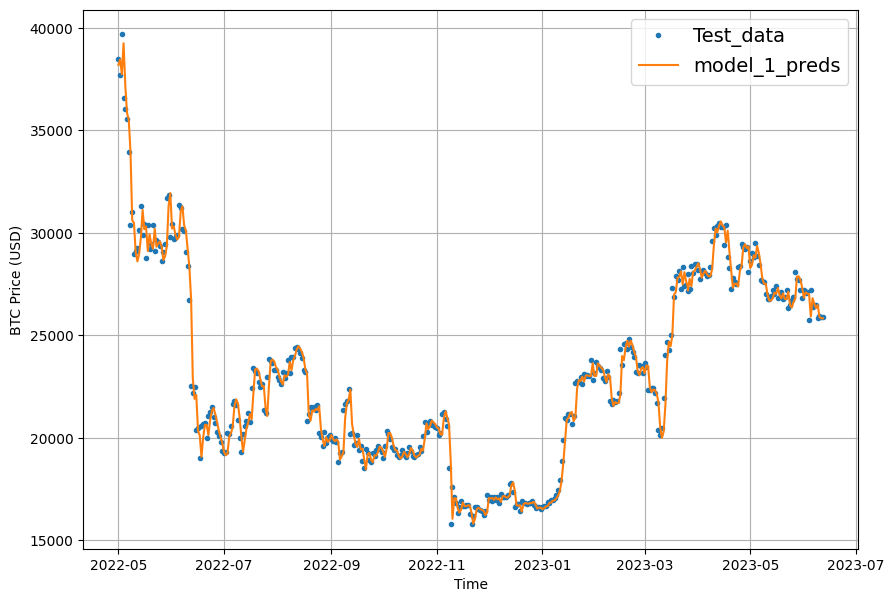

In [40]:
# Visualising the results
offset=300
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:,0], start=offset, label='Test_data')
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_1_preds, start=offset, format='-', label='model_1_preds')

# 2. Model 2: Dense (Window = 30, Horizon = 1)

Using a window of 30 days to predict the next 1 price

In [41]:
HORIZON = 1
WINDOW_SIZE = 30 # 30 timesteps in the past

In [42]:
# Make windowed data with appropriate horizon and window sizes
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(3513, 3513)

In [43]:
# Make train and test windows
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows, labels=full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2810, 703, 2810, 703)

In [44]:
# Creating model 2 using the same structure as model 1

tf.random.set_seed(42)

# Model
model_2 = tf.keras.Sequential([
    layers.Dense(128, activation='relu'),
    layers.Dense(HORIZON, activation='linear') # same as having no activation
], name='model_2_dense')

model_2.compile(loss='mae',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae'])

# Fit the model
model_2_history = model_2.fit(x=train_windows,
                              y=train_labels,
                              epochs=100,
                              verbose=1,
                              batch_size=128,
                              validation_data=(test_windows, test_labels),
                              callbacks=[create_model_checkpoint(model_name=model_2.name)])

Epoch 1/100
15/22 [===================>..........] - ETA: 0s - loss: 1509.4216 - mae: 1509.4216 

22/22 [==============================] - 2s 33ms/step - loss: 1349.8119 - mae: 1349.8119 - val_loss: 2754.7444 - val_mae: 2754.7444
Epoch 2/100
20/22 [==========================>...] - ETA: 0s - loss: 542.8727 - mae: 542.8727

22/22 [==============================] - 1s 25ms/step - loss: 536.8442 - mae: 536.8442 - val_loss: 1528.1550 - val_mae: 1528.1550
Epoch 3/100
19/22 [========================>.....] - ETA: 0s - loss: 411.5768 - mae: 411.5768

22/22 [==============================] - 1s 25ms/step - loss: 402.1273 - mae: 402.1273 - val_loss: 1256.9200 - val_mae: 1256.9200
Epoch 4/100
22/22 [==============================] - 0s 5ms/step - loss: 400.7026 - mae: 400.7026 - val_loss: 1464.2628 - val_mae: 1464.2628
Epoch 5/100
22/22 [==============================] - 0s 5ms/step - loss: 423.0588 - mae: 423.0588 - val_loss: 2134.3777 - val_mae: 2134.3777
Epoch 6/100
16/22 [====================>.........] - ETA: 0s - loss: 388.6690 - mae: 388.6690

22/22 [==============================] - 1s 26ms/step - loss: 398.4205 - mae: 398.4205 - val_loss: 1201.2581 - val_mae: 1201.2581
Epoch 7/100
22/22 [==============================] - 0s 5ms/step - loss: 408.2267 - mae: 408.2267 - val_loss: 1985.0093 - val_mae: 1985.0093
Epoch 8/100
19/22 [========================>.....] - ETA: 0s - loss: 378.1114 - mae: 378.1114

22/22 [==============================] - 1s 27ms/step - loss: 369.0010 - mae: 369.0010 - val_loss: 1174.8298 - val_mae: 1174.8298
Epoch 9/100
22/22 [==============================] - 0s 5ms/step - loss: 402.1808 - mae: 402.1808 - val_loss: 1951.5160 - val_mae: 1951.5160
Epoch 10/100
22/22 [==============================] - 0s 5ms/step - loss: 330.6948 - mae: 330.6948 - val_loss: 1410.9315 - val_mae: 1410.9315
Epoch 11/100
22/22 [==============================] - 0s 5ms/step - loss: 338.4936 - mae: 338.4936 - val_loss: 2103.6484 - val_mae: 2103.6484
Epoch 12/100
22/22 [==============================] - 0s 5ms/step - loss: 370.1557 - mae: 370.1557 - val_loss: 1645.3770 - val_mae: 1645.3770
Epoch 13/100
22/22 [==============================] - 0s 5ms/step - loss: 340.0061 - mae: 340.0061 - val_loss: 1447.1255 - val_mae: 1447.1255
Epoch 14/100
22/22 [==============================] - 0s 6ms/step - loss: 364.1358 - mae: 364.1358 - val_loss: 1638.0786 - val_mae: 1638.0786
Epoch 15/100
22/22 

22/22 [==============================] - 1s 26ms/step - loss: 293.0508 - mae: 293.0508 - val_loss: 1079.8367 - val_mae: 1079.8367
Epoch 18/100
22/22 [==============================] - 0s 5ms/step - loss: 291.8543 - mae: 291.8543 - val_loss: 1171.6226 - val_mae: 1171.6226
Epoch 19/100
22/22 [==============================] - 0s 5ms/step - loss: 300.9350 - mae: 300.9350 - val_loss: 1096.1001 - val_mae: 1096.1001
Epoch 20/100
22/22 [==============================] - 0s 5ms/step - loss: 309.5026 - mae: 309.5026 - val_loss: 1258.4818 - val_mae: 1258.4818
Epoch 21/100
22/22 [==============================] - 0s 5ms/step - loss: 312.4251 - mae: 312.4251 - val_loss: 1166.7577 - val_mae: 1166.7577
Epoch 22/100
22/22 [==============================] - 0s 5ms/step - loss: 392.9345 - mae: 392.9345 - val_loss: 1556.0896 - val_mae: 1556.0896
Epoch 23/100
16/22 [====================>.........] - ETA: 0s - loss: 296.7533 - mae: 296.7533

22/22 [==============================] - 1s 26ms/step - loss: 289.2525 - mae: 289.2525 - val_loss: 933.3842 - val_mae: 933.3842
Epoch 24/100
22/22 [==============================] - 0s 5ms/step - loss: 276.5723 - mae: 276.5723 - val_loss: 979.2073 - val_mae: 979.2073
Epoch 25/100
16/22 [====================>.........] - ETA: 0s - loss: 316.3546 - mae: 316.3546

22/22 [==============================] - 1s 32ms/step - loss: 299.1107 - mae: 299.1107 - val_loss: 924.3868 - val_mae: 924.3868
Epoch 26/100
22/22 [==============================] - 0s 6ms/step - loss: 280.3556 - mae: 280.3556 - val_loss: 1154.4249 - val_mae: 1154.4249
Epoch 27/100
22/22 [==============================] - 0s 9ms/step - loss: 329.5731 - mae: 329.5731 - val_loss: 1115.4882 - val_mae: 1115.4882
Epoch 28/100
22/22 [==============================] - 0s 7ms/step - loss: 287.9760 - mae: 287.9760 - val_loss: 1179.1136 - val_mae: 1179.1136
Epoch 29/100
22/22 [==============================] - 0s 7ms/step - loss: 263.1884 - mae: 263.1884 - val_loss: 1040.4481 - val_mae: 1040.4481
Epoch 30/100
22/22 [==============================] - 0s 7ms/step - loss: 273.5265 - mae: 273.5265 - val_loss: 926.9222 - val_mae: 926.9222
Epoch 31/100
22/22 [==============================] - 0s 7ms/step - loss: 279.0851 - mae: 279.0851 - val_loss: 925.7610 - val_mae: 925.7610
Epoch 32/100
13/22 [====

22/22 [==============================] - 1s 36ms/step - loss: 261.8783 - mae: 261.8783 - val_loss: 912.3419 - val_mae: 912.3419
Epoch 33/100
22/22 [==============================] - 0s 7ms/step - loss: 268.9636 - mae: 268.9636 - val_loss: 1117.7869 - val_mae: 1117.7869
Epoch 34/100
13/22 [================>.............] - ETA: 0s - loss: 263.8302 - mae: 263.8302

22/22 [==============================] - 1s 28ms/step - loss: 262.0544 - mae: 262.0544 - val_loss: 903.2139 - val_mae: 903.2139
Epoch 35/100
22/22 [==============================] - 0s 6ms/step - loss: 262.4720 - mae: 262.4720 - val_loss: 974.4354 - val_mae: 974.4354
Epoch 36/100
15/22 [===================>..........] - ETA: 0s - loss: 283.1488 - mae: 283.1488

22/22 [==============================] - 1s 27ms/step - loss: 273.2178 - mae: 273.2178 - val_loss: 900.2653 - val_mae: 900.2653
Epoch 37/100
22/22 [==============================] - 0s 5ms/step - loss: 284.7323 - mae: 284.7323 - val_loss: 1026.2124 - val_mae: 1026.2124
Epoch 38/100
15/22 [===================>..........] - ETA: 0s - loss: 262.2462 - mae: 262.2462

22/22 [==============================] - 1s 28ms/step - loss: 262.0431 - mae: 262.0431 - val_loss: 890.6019 - val_mae: 890.6019
Epoch 39/100
22/22 [==============================] - 0s 5ms/step - loss: 390.6713 - mae: 390.6713 - val_loss: 1692.4244 - val_mae: 1692.4244
Epoch 40/100
22/22 [==============================] - 0s 5ms/step - loss: 406.0493 - mae: 406.0493 - val_loss: 1276.6455 - val_mae: 1276.6455
Epoch 41/100
22/22 [==============================] - 0s 5ms/step - loss: 444.5769 - mae: 444.5769 - val_loss: 1038.5056 - val_mae: 1038.5056
Epoch 42/100
22/22 [==============================] - 0s 6ms/step - loss: 279.5136 - mae: 279.5136 - val_loss: 1296.4082 - val_mae: 1296.4082
Epoch 43/100
22/22 [==============================] - 0s 5ms/step - loss: 311.5988 - mae: 311.5988 - val_loss: 1028.7380 - val_mae: 1028.7380
Epoch 44/100
22/22 [==============================] - 0s 5ms/step - loss: 284.0861 - mae: 284.0861 - val_loss: 998.6230 - val_mae: 998.6230
Epoch 45/100
22/22 [==

22/22 [==============================] - 1s 39ms/step - loss: 272.1642 - mae: 272.1642 - val_loss: 886.5505 - val_mae: 886.5505
Epoch 50/100
22/22 [==============================] - 0s 5ms/step - loss: 282.0179 - mae: 282.0179 - val_loss: 1907.0669 - val_mae: 1907.0669
Epoch 51/100
22/22 [==============================] - 0s 6ms/step - loss: 280.0924 - mae: 280.0924 - val_loss: 999.8671 - val_mae: 999.8671
Epoch 52/100
22/22 [==============================] - 0s 5ms/step - loss: 396.2442 - mae: 396.2442 - val_loss: 1837.0674 - val_mae: 1837.0674
Epoch 53/100
22/22 [==============================] - 0s 6ms/step - loss: 302.9718 - mae: 302.9718 - val_loss: 908.5701 - val_mae: 908.5701
Epoch 54/100
18/22 [=======================>......] - ETA: 0s - loss: 242.5686 - mae: 242.5686

22/22 [==============================] - 1s 29ms/step - loss: 245.1835 - mae: 245.1835 - val_loss: 861.3191 - val_mae: 861.3191
Epoch 55/100
22/22 [==============================] - 0s 5ms/step - loss: 257.4926 - mae: 257.4926 - val_loss: 874.2543 - val_mae: 874.2543
Epoch 56/100
22/22 [==============================] - 0s 5ms/step - loss: 252.9133 - mae: 252.9133 - val_loss: 1213.2120 - val_mae: 1213.2120
Epoch 57/100
22/22 [==============================] - 0s 5ms/step - loss: 252.1683 - mae: 252.1683 - val_loss: 954.9133 - val_mae: 954.9133
Epoch 58/100
22/22 [==============================] - 0s 5ms/step - loss: 316.4200 - mae: 316.4200 - val_loss: 2417.3110 - val_mae: 2417.3110
Epoch 59/100
22/22 [==============================] - 0s 6ms/step - loss: 292.7943 - mae: 292.7943 - val_loss: 1050.6742 - val_mae: 1050.6742
Epoch 60/100
22/22 [==============================] - 0s 5ms/step - loss: 269.1184 - mae: 269.1184 - val_loss: 1185.0587 - val_mae: 1185.0587
Epoch 61/100
22/22 [====

22/22 [==============================] - 1s 27ms/step - loss: 275.1831 - mae: 275.1831 - val_loss: 846.5027 - val_mae: 846.5027
Epoch 74/100
22/22 [==============================] - 0s 6ms/step - loss: 302.8505 - mae: 302.8505 - val_loss: 975.5421 - val_mae: 975.5421
Epoch 75/100
22/22 [==============================] - 0s 5ms/step - loss: 348.7192 - mae: 348.7192 - val_loss: 1109.6564 - val_mae: 1109.6564
Epoch 76/100
22/22 [==============================] - 0s 5ms/step - loss: 311.5373 - mae: 311.5373 - val_loss: 960.6984 - val_mae: 960.6984
Epoch 77/100
22/22 [==============================] - 0s 6ms/step - loss: 247.7872 - mae: 247.7872 - val_loss: 1006.2796 - val_mae: 1006.2796
Epoch 78/100
22/22 [==============================] - 0s 6ms/step - loss: 250.9032 - mae: 250.9032 - val_loss: 847.4319 - val_mae: 847.4319
Epoch 79/100
22/22 [==============================] - 0s 6ms/step - loss: 254.7090 - mae: 254.7090 - val_loss: 1158.9053 - val_mae: 1158.9053
Epoch 80/100
22/22 [======

22/22 [==============================] - 1s 37ms/step - loss: 271.0539 - mae: 271.0539 - val_loss: 839.4577 - val_mae: 839.4577
Epoch 96/100
13/22 [================>.............] - ETA: 0s - loss: 310.6988 - mae: 310.6988

22/22 [==============================] - 1s 36ms/step - loss: 281.3390 - mae: 281.3390 - val_loss: 838.4990 - val_mae: 838.4990
Epoch 97/100
22/22 [==============================] - 0s 6ms/step - loss: 234.2894 - mae: 234.2894 - val_loss: 1146.2904 - val_mae: 1146.2904
Epoch 98/100
22/22 [==============================] - 0s 5ms/step - loss: 245.1036 - mae: 245.1036 - val_loss: 846.6195 - val_mae: 846.6195
Epoch 99/100
22/22 [==============================] - 0s 6ms/step - loss: 267.1542 - mae: 267.1542 - val_loss: 916.8890 - val_mae: 916.8890
Epoch 100/100
22/22 [==============================] - 0s 5ms/step - loss: 260.6069 - mae: 260.6069 - val_loss: 1113.4796 - val_mae: 1113.4796


In [45]:
# Loading the best performing model
model_2 = tf.keras.models.load_model('model_experiments/model_2_dense/')
model_2.evaluate(test_windows, test_labels)

22/22 [==============================] - 0s 2ms/step - loss: 838.4994 - mae: 838.4994


[838.4993896484375, 838.4993896484375]

In [46]:
# Making predictions
model_2_preds = make_preds(model_2,
                           input_data=test_windows)
len(model_2_preds), model_2_preds[:10]

22/22 [==============================] - 0s 2ms/step


(703,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([33651.965, 34360.9  , 33807.74 , 32567.389, 31748.89 , 31904.033,
        31565.357, 31318.639, 31386.328, 30833.396], dtype=float32)>)

In [47]:
# Evaluating metrics
model_2_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_2_preds)
model_2_results

{'mae': 838.49927,
 'mse': 1592325.5,
 'rmse': 1261.8738,
 'mape': 2.4627018,
 'mase': 1.0902814}

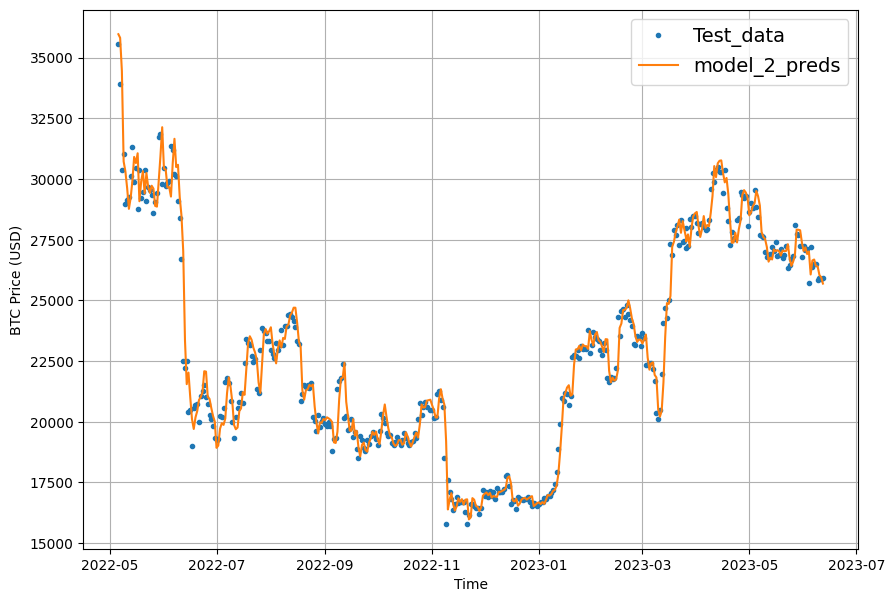

In [48]:
# Visualising the results
offset=300
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:,0], start=offset, label='Test_data')
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_2_preds, start=offset, format='-', label='model_2_preds')

# 3. Model 3: Dense (Window = 30, Horizon = 7)

Predict 7 days ahead given the past 30 days of information

In [49]:
HORIZON = 7
WINDOW_SIZE = 30

full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(3507, 3507)

In [50]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows, labels=full_labels, test_split=0.2)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2805, 702, 2805, 702)

In [51]:
tf.random.set_seed(42)

# create model (same as model_1 except with different data input size)
model_3 = tf.keras.Sequential([
    layers.Dense(128, activation='relu'),
    layers.Dense(HORIZON)
], name='model_3_dense')

model_3.compile(loss='mae',
                optimizer=tf.keras.optimizers.Adam())

model_3.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs=100,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_3.name)])

In [52]:
# Load in best version of model_3 and evaluate
model_3 = tf.keras.models.load_model("model_experiments/model_3_dense/")
model_3.evaluate(test_windows, test_labels)

22/22 [==============================] - 0s 2ms/step - loss: 1616.1296


1616.129638671875

In [53]:
# The predictions are going to be 7 steps at a time (this is the HORIZON size)
model_3_preds = make_preds(model_3,
                           input_data=test_windows)
model_3_preds[:5]

22/22 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(5, 7), dtype=float32, numpy=
array([[33918.938, 35046.7  , 33232.418, 34383.56 , 34041.508, 34620.562,
        34602.207],
       [34272.098, 35013.953, 35267.05 , 34346.754, 34471.336, 34345.387,
        34475.06 ],
       [33844.434, 34859.703, 33541.168, 33820.273, 34731.59 , 34420.43 ,
        34699.324],
       [32605.367, 33752.6  , 32850.535, 32511.516, 32797.34 , 33025.395,
        32671.375],
       [33936.594, 33903.598, 33145.195, 32976.918, 32588.9  , 33635.01 ,
        34240.582]], dtype=float32)>

In [54]:
# Calculate model_3 results - these are going to be multi-dimensional because
# we're trying to predict more than one step at a time.
model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_3_preds)
model_3_results

{'mae': array([ 646.4654 , 1147.786  , 1103.6298 ,  725.80524,  893.3273 ,
        1259.2698 , 1771.5881 , 1791.4344 ,  771.78406,  894.3647 ,
         891.4869 , 1012.76953, 1671.0404 , 2050.9175 , 2804.2    ,
        4689.497  , 4586.7466 , 5046.7188 , 5816.6025 , 5322.811  ,
        4941.792  , 3760.3416 , 1736.9642 , 1048.1022 ,  983.5781 ,
        1736.2489 , 2367.138  , 1806.4475 , 3024.0708 , 4526.0034 ,
        5132.004  , 4697.101  , 3655.7126 , 1946.2249 , 1961.908  ,
        1077.1584 , 1446.7701 , 1136.683  , 1276.7858 , 1214.1556 ,
        1701.1077 , 1793.1406 , 1945.043  , 2484.5642 , 3353.184  ,
        2728.9536 , 1131.8119 ,  811.68585, 1427.8627 , 1826.1775 ,
        1329.0033 ,  917.80524, 1445.548  , 1064.6222 , 1078.4626 ,
        1424.5664 , 2264.2104 , 2741.048  , 2594.2812 , 2571.2349 ,
        3006.7573 , 3742.2678 , 5196.93   , 6727.582  , 3078.2148 ,
         881.2645 ,  825.91406, 1670.6467 , 2515.394  , 1874.1702 ,
        2709.7761 , 2377.0994 , 2871.342 

The metrics are multi-dimensional since we are predicting on multiple future values (predictions are evlauated across the horizon timesteps (7 predictions at a time))

  * The evaluation function `evaluate_preds()` needs to be adjusted to work with multiple shapes of data
    * Will reduce each metric by the average value to squeeze into 1 dimension

## Evaluation function update

In [55]:
# Function for calulating all metrics
def evaluate_preds(y_true, y_pred):
  # Ensure in float32 for metric caluclations
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  # Account for different sized metrics (for longer horizons, reduce to single number)
  if mae.ndim > 0: # if mae isn't already a scalar, reduce it to one by aggregating tensors to mean
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mape = tf.reduce_mean(mape)
    mase = tf.reduce_mean(mase)

  return{'mae': mae.numpy(),
         'mse': mse.numpy(),
         'rmse': rmse.numpy(),
         'mape': mape.numpy(),
         'mase': mase.numpy()}

In [56]:
# Get model_3 metrics averaged into 1 value
model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_3_preds)
model_3_results

{'mae': 1616.1294,
 'mse': 5707828.5,
 'rmse': 1855.8741,
 'mape': 4.8281074,
 'mase': 2.0948575}

The same issue arises when plotting the prediction

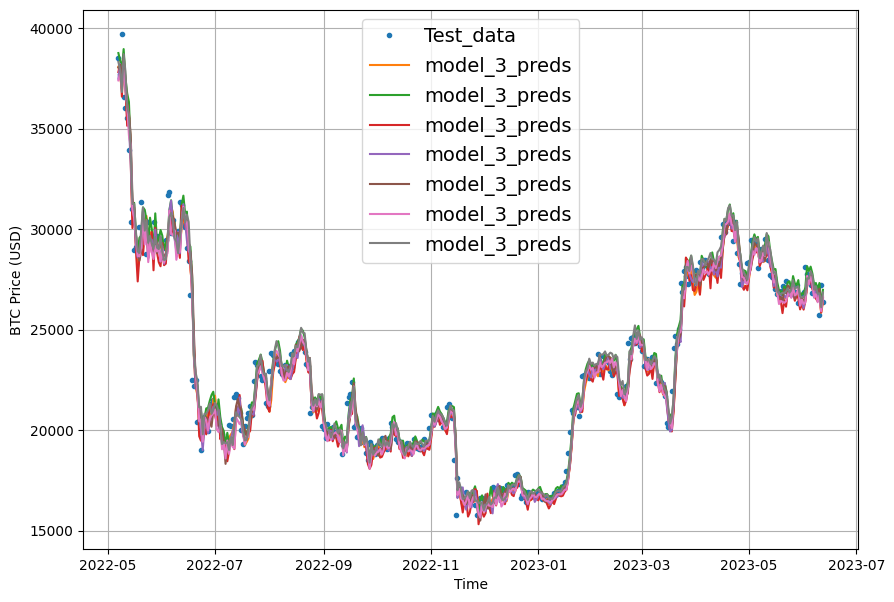

In [57]:
# Visualising model_3 if the prediction is multi-dimensional:
offset=300
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:,0], start=offset, label='Test_data')
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_3_preds, start=offset, format='-', label='model_3_preds')

NOTE: Reducing the 7-day horizon to 1 value loses information from the original prediction. As in, the model predictions were trained to be made for 7 days but by reducing them to 1, we gain the ability to plot them visually but lose the extra information contained across multiple days. This means the predictions will look further ahead than the test data.

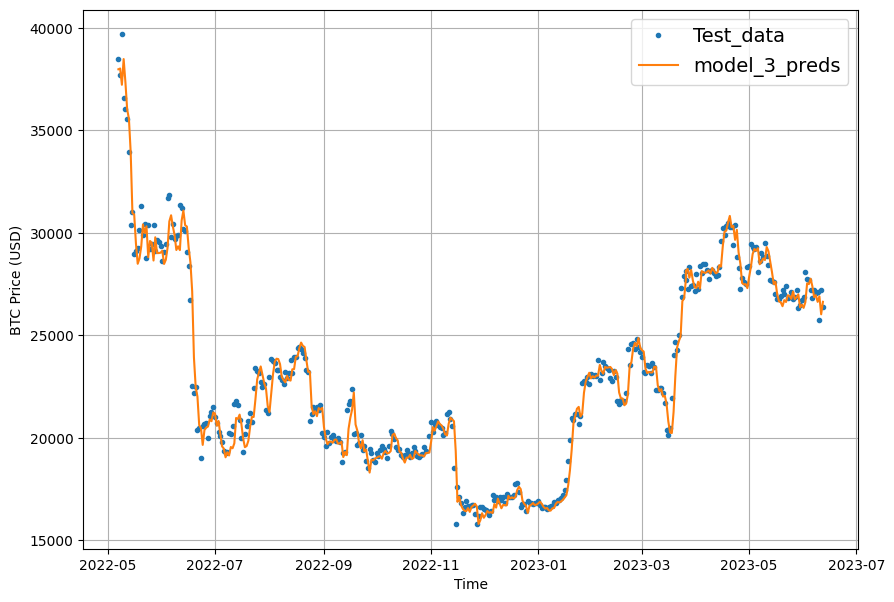

In [58]:
# Aggregating the model's predictions
offset=300
plt.figure(figsize=(10, 7))

plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=test_labels[:,0],
                 start=offset,
                 label='Test_data')
plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=tf.reduce_mean(model_3_preds, axis=1),
                 format='-',
                 start=offset,
                 label='model_3_preds')

## Comparing the best model so far

In [59]:
initial_model_results = pd.DataFrame({'naive': naive_results,
                                      'horizon_1_window_7': model_1_results,
                                      'horizon_1_window_30': model_2_results,
                                      'horizon_7_window_30': model_3_results})
initial_model_results = initial_model_results.transpose()
initial_model_results

,mae,mse,rmse,mape,mase
naive,767.571411,1358397.375,1165.503052,2.260695,0.999029
horizon_1_window_7,785.100098,1419880.375,1191.587280,2.310781,1.021844
horizon_1_window_30,838.499268,1592325.500,1261.873779,2.462702,1.090281
horizon_7_window_30,1616.129395,5707828.500,1855.874146,4.828107,2.094857


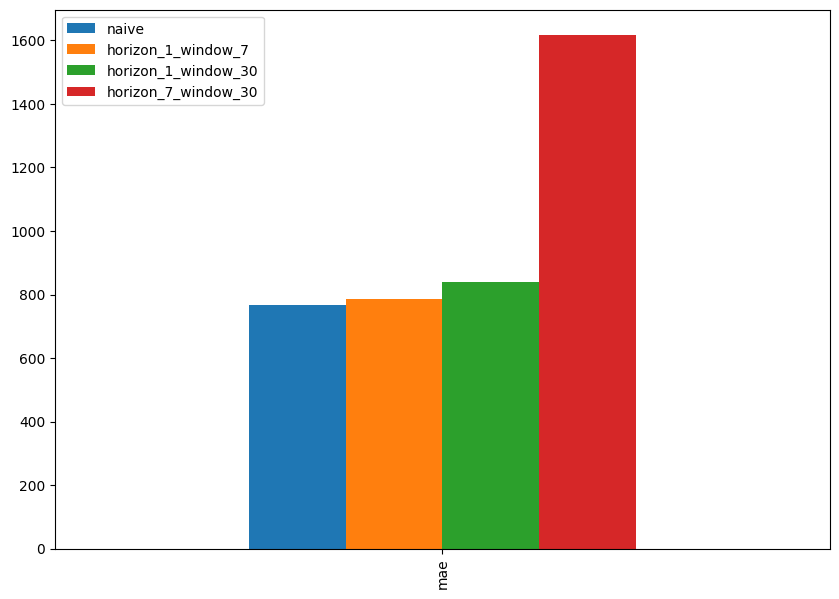

In [60]:
initial_model_results = pd.DataFrame({'naive': naive_results['mae'],
                                      'horizon_1_window_7': model_1_results['mae'],
                                      'horizon_1_window_30': model_2_results['mae'],
                                      'horizon_7_window_30': model_3_results['mae']},
                                      index=['mae']).plot(figsize=(10, 7), kind='bar')

Very hard to best naive model in open systems.
Dense model with window 7 and horizon 1 performs closest to the naive model, so will use this goind forward for window and horizon sizes.

# 4. Model 4: Conv1D

In [61]:
HORIZON = 1 # predict next day
WINDOW_SIZE = 7 # use previous week worth of data

In [62]:
# Create windowed dataset
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(3536, 3536)

In [63]:
# Create train/test splits
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2828, 708, 2828, 708)

Conv1D layer takes an input of `(batch_size, timesteps, input_dim)`

* `batch_size` is handled
* `timesteps` = `WINDOW_SIZE` (features, the prior values of Bitcoin)
* `input_dim` = `HORIZON` (prediction)

The data has the `timesteps` dimension ready, but requires adjustment to have `input_dim` dimension. A lambda layer will be used to increae the dimensionality.

In [64]:
# Check data sample shapes
train_windows[0].shape # returns (WINDOW_SIZE, )

(7,)

In [65]:
# Reshaping the data example
x = tf.constant(train_windows[0])
expand_dims_layer = layers.Lambda(lambda x: tf.expand_dims(x, axis=1)) # adds an extra dimension for input_dim
print(f'Original shape: {x.shape}') # WINDOW_SIZE
print(f'Expanded shape: {expand_dims_layer(x).shape}') # (WINDOW_SIZE, input_dim)
print(f'Original values with expanded shape:\n {expand_dims_layer(x)}')


Original shape: (7,)
Expanded shape: (7, 1)
Original values with expanded shape:
 [[132.18]
 [114.13]
 [123.63]
 [129.01]
 [128.55]
 [129.  ]
 [126.94]]


In [66]:
# Creating the model with the reshaping layer
tf.random.set_seed(42)

# Create model
model_4 = tf.keras.Sequential([
    layers.Lambda(lambda x: tf.expand_dims(x, axis=1)), # resize the inputs to adjust for window size
    layers.Conv1D(filters=128, kernel_size=5, padding='causal', activation='relu'),
    layers.Dense(HORIZON)
], name='model_4_conv1D')

# Compile model
model_4.compile(loss='mae',
                optimizer=tf.keras.optimizers.Adam())

# Fit model
model_4.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs=100,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_4.name)])

In [67]:
model_4.summary()

Model: "model_4_conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_1 (Lambda)           (None, 1, 7)              0         
                                                                 
 conv1d (Conv1D)             (None, 1, 128)            4608      
                                                                 
 dense_6 (Dense)             (None, 1, 1)              129       
                                                                 
Total params: 4,737
Trainable params: 4,737
Non-trainable params: 0
_________________________________________________________________


In [68]:
# Load in best performing Conv1D model and evaluate it on the test data
model_4 = tf.keras.models.load_model("model_experiments/model_4_conv1D")
model_4.evaluate(test_windows, test_labels)

23/23 [==============================] - 0s 3ms/step - loss: 788.1550


788.155029296875

In [69]:
# Make predictions
model_4_preds = make_preds(model_4, test_windows)
model_4_preds[:10]

23/23 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([34223.707, 34053.824, 33932.223, 33098.164, 33585.54 , 33591.293,
       34156.34 , 33474.293, 32734.273, 32708.17 ], dtype=float32)>

In [70]:
# Evaluate predictions
model_4_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_4_preds)
model_4_results

{'mae': 788.155,
 'mse': 1449151.5,
 'rmse': 1203.807,
 'mape': 2.3269818,
 'mase': 1.0258198}

# 5. Model 5: LSTM RNN

Same model structure as `model_4`, but using a RNN instead of Conv1D.

LSTM also requires reshaping the input tensors to `[batch, timesteps, feature]`.

In [71]:
# Creating the model with the reshaping layer
tf.random.set_seed(42)

# Create model using functional API
inputs = layers.Input(shape=(WINDOW_SIZE))
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs)
x = layers.LSTM(128, activation='relu')(x)
output = layers.Dense(HORIZON)(x)
model_5 = tf.keras.Model(inputs=inputs,
                         outputs=output,
                         name='model_5_lstm')

# Compile model
model_5.compile(loss='mae',
                optimizer=tf.keras.optimizers.Adam())

# Fit model
model_5.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs=100,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_5.name)])

In [72]:
# Load in best version of model 5 and evaluate on the test data
model_5 = tf.keras.models.load_model("model_experiments/model_5_lstm/")
model_5.evaluate(test_windows, test_labels)

23/23 [==============================] - 0s 3ms/step - loss: 813.7459


813.7459106445312

In [73]:
# Make predictions with our LSTM model
model_5_preds = make_preds(model_5, test_windows)
model_5_preds[:10]

23/23 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([34153.133, 33939.96 , 33882.28 , 33149.543, 33488.09 , 33364.453,
       34044.605, 33420.05 , 32692.54 , 32709.418], dtype=float32)>

In [74]:
# Evaluate model 5 preds
model_5_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_5_preds)
model_5_results

{'mae': 813.7459,
 'mse': 1504959.5,
 'rmse': 1226.768,
 'mape': 2.4030235,
 'mase': 1.0591274}

# 6. Model 6: Dense (Multivariate dataset)

Give the model more information can help increase performance (more data to predict a trend)
  * Will add the Bitcoin block reward size over time to the dataset

## Creating a multivariate dataset

In [75]:
bitcoin_prices.head()

,Price (USD)
Date,
2013-09-30,132.18
2013-10-01,114.13
2013-10-02,123.63
2013-10-03,129.01
2013-10-04,128.55


In [76]:
# Block reward values (https://www.cmcmarkets.com/en/learn-cryptocurrencies/bitcoin-halving)
# Block reward values
block_reward_1 = 50 # 3 January 2009 (2009-01-03) - this block reward isn't in our dataset (it starts from 30 September 2013)
block_reward_2 = 25 # 28 November 2012
block_reward_3 = 12.5 # 9 July 2016
block_reward_4 = 6.25 # 11 May 2020

# Block reward dates (datetime form of the above date stamps)
block_reward_2_datetime = np.datetime64("2012-11-28")
block_reward_3_datetime = np.datetime64("2016-07-09")
block_reward_4_datetime = np.datetime64("2020-05-11")

In [77]:
# Get date indexed for when to add in different block dates
# Get date indexes for when to add in different block dates
block_reward_2_days = (block_reward_3_datetime - bitcoin_prices.index[0]).days
block_reward_3_days = (block_reward_4_datetime - bitcoin_prices.index[0]).days
block_reward_2_days, block_reward_3_days

(1013, 2415)

Now have the indexes of when the block reward halves, so can get the number fo days from the 1st index of the data.

* everything up to index 1013 is block reward 2
* between index 1013 - 2415 is block reward 3
* everything after index 2421 is block reward 4

There is a scheduled block halving for 2024, so woudl need to be amended.

In [78]:
# Add block_reward column
bitcoin_prices_block = bitcoin_prices.copy()
bitcoin_prices_block["block_reward"] = None

# Set values of block_reward column (it's the last column hence -1 indexing on iloc)
bitcoin_prices_block.iloc[:block_reward_2_days, -1] = block_reward_2
bitcoin_prices_block.iloc[block_reward_2_days:block_reward_3_days, -1] = block_reward_3
bitcoin_prices_block.iloc[block_reward_3_days:, -1] = block_reward_4
bitcoin_prices_block.head()

,Price (USD),block_reward
Date,,
2013-09-30,132.18,25
2013-10-01,114.13,25
2013-10-02,123.63,25
2013-10-03,129.01,25
2013-10-04,128.55,25


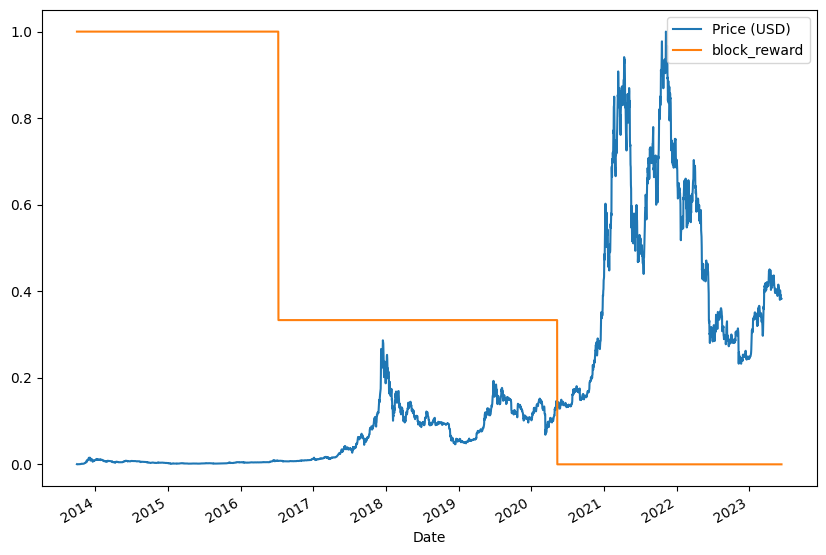

In [79]:
# Plot the block reward/price over time
# Note: Because of the different scales of our values we'll scale them to be between 0 and 1.
from sklearn.preprocessing import minmax_scale
scaled_price_block_df = pd.DataFrame(minmax_scale(bitcoin_prices_block[["Price (USD)", "block_reward"]]), # we need to scale the data first
                                     columns=bitcoin_prices_block.columns,
                                     index=bitcoin_prices_block.index)
scaled_price_block_df.plot(figsize=(10, 7));

## Making windowed dataset

Prior windowing functions wont work with the multivariate data.

Can use the `.shift()` method to window the data

In [80]:
# Setup dataset hyperparameters
HORIZON = 1
WINDOW_SIZE = 7

In [81]:
# Make a copy of the Bitcoin historical data with block reward feature
bitcoin_prices_windowed = bitcoin_prices_block.copy()

# Add windowed columns
for i in range(WINDOW_SIZE): # Shift values for each step in WINDOW_SIZE
  bitcoin_prices_windowed[f"Price (USD)+{i+1}"] = bitcoin_prices_windowed["Price (USD)"].shift(periods=i+1)
bitcoin_prices_windowed.head(10)

,Price (USD),block_reward,Price (USD)+1,Price (USD)+2,Price (USD)+3,Price (USD)+4,Price (USD)+5,Price (USD)+6,Price (USD)+7
Date,,,,,,,,,
2013-09-30,132.18,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-01,114.13,25,132.18,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,123.63,25,114.13,132.18,NaN,NaN,NaN,NaN,NaN
2013-10-03,129.01,25,123.63,114.13,132.18,NaN,NaN,NaN,NaN
2013-10-04,128.55,25,129.01,123.63,114.13,132.18,NaN,NaN,NaN
2013-10-05,129.00,25,128.55,129.01,123.63,114.13,132.18,NaN,NaN
2013-10-06,126.94,25,129.00,128.55,129.01,123.63,114.13,132.18,NaN
2013-10-07,126.00,25,126.94,129.00,128.55,129.01,123.63,114.13,132.18
2013-10-08,130.69,25,126.00,126.94,129.00,128.55,129.01,123.63,114.13


In [82]:
# Let's create X & y, remove the NaN's and convert to float32 to prevent TensorFlow errors
X = bitcoin_prices_windowed.dropna().drop("Price (USD)", axis=1).astype(np.float32)
y = bitcoin_prices_windowed.dropna()["Price (USD)"].astype(np.float32)
X.head()

,block_reward,Price (USD)+1,Price (USD)+2,Price (USD)+3,Price (USD)+4,Price (USD)+5,Price (USD)+6,Price (USD)+7
Date,,,,,,,,
2013-10-07,25.0,126.940002,129.000000,128.550003,129.009995,123.629997,114.129997,132.179993
2013-10-08,25.0,126.000000,126.940002,129.000000,128.550003,129.009995,123.629997,114.129997
2013-10-09,25.0,130.690002,126.000000,126.940002,129.000000,128.550003,129.009995,123.629997
2013-10-10,25.0,130.589996,130.690002,126.000000,126.940002,129.000000,128.550003,129.009995
2013-10-11,25.0,130.899994,130.589996,130.690002,126.000000,126.940002,129.000000,128.550003


In [83]:
# View labels
y.head()

Date
2013-10-07    126.000000
2013-10-08    130.690002
2013-10-09    130.589996
2013-10-10    130.899994
2013-10-11    135.190002
Name: Price (USD), dtype: float32

In [84]:
# Make train and test sets
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(2828, 2828, 708, 708)

## Modelling

Same as model 1, but using the multivariate dataset

In [85]:
tf.random.set_seed(42)

# Make multivariate time series model
model_6 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  #layers.Dense(128, activation="relu"), # Additional dense layer here beats the naive model
  layers.Dense(HORIZON)
], name="model_6_dense_multivariate")

# Compile
model_6.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit
model_6.fit(X_train, y_train,
            epochs=100,
            batch_size=128,
            verbose=0,
            validation_data=(X_test, y_test),
            callbacks=[create_model_checkpoint(model_name=model_6.name)])

In [86]:
# Make sure best model is loaded and evaluate
model_6 = tf.keras.models.load_model("model_experiments/model_6_dense_multivariate")
model_6.evaluate(X_test, y_test)

23/23 [==============================] - 0s 2ms/step - loss: 770.8343


770.8342895507812

In [87]:
# Make predictions on multivariate data
model_6_preds = tf.squeeze(model_6.predict(X_test))
model_6_preds[:10]

23/23 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([33949.26 , 33960.188, 33841.35 , 32888.184, 33706.133, 33483.668,
       34155.59 , 33281.414, 32515.83 , 32713.094], dtype=float32)>

In [88]:
# Evaluate preds
model_6_results = evaluate_preds(y_true=y_test,
                                 y_pred=model_6_preds)
model_6_results

{'mae': 770.8343,
 'mse': 1380126.0,
 'rmse': 1174.7876,
 'mape': 2.272198,
 'mase': 1.003276}

# 7. Model 7: N-BEATS Algorithm

A deeper model used for univariate time series problems https://arxiv.org/pdf/1905.10437.pdf.

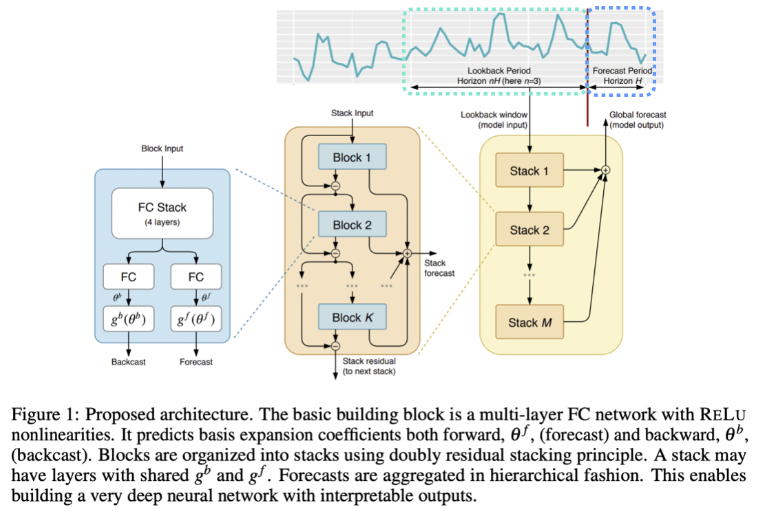

Replicating the generic architecture of N-BEATS, which has forewards and backward predictions with double stacking residuals and skip connections.

## Creating a class

In [89]:
# Creating a class to build an N-BEATS layer using subclassing on keras.Layer
# Create NBeatsBlock custom layer
class NBeatsBlock(tf.keras.layers.Layer):
  def __init__(self, #the constructor takes all hyperparameters for the layer
               input_size: int,
               theta_size: int,
               horizon: int,
               n_neurons: int,
               n_layers: int,
               **kwargs): # **kwargs takes care of all of the arguments for hte parent class (input_shape, trainable, name)
    super().__init__(**kwargs)
    self.input_size = input_size
    self.theta_size = theta_size
    self.horizon = horizon
    self.n_neurons = n_neurons
    self.n_layers = n_layers

    # Block contains stack of 4 fully connected layers each has ReLU activation
    self.hidden = [tf.keras.layers.Dense(n_neurons, activation='relu') for _ in range(n_layers)]
    # Output of block is a theta layer with linear activation
    self.theta_layer = tf.keras.layers.Dense(theta_size, activation='linear', name='theta')

  def call(self, inputs): # call method is what runs when the layer is called
    x = inputs
    for layer in self.hidden: # pass inputs through each hidden layer
      x = layer(x)
    theta = self.theta_layer(x)
    # Output the backcast and forecast from theta
    backcast, forecast = theta[:, :self.input_size], theta[:, -self.horizon:]
    return backcast, forecast

In [90]:
# Set up dummy nBeatsBlock layer to represent input sand outputs
dummy_nbeats_block_layer = NBeatsBlock(input_size=WINDOW_SIZE,
                                       theta_size=WINDOW_SIZE+HORIZON, # backcast + forecast
                                       horizon=HORIZON,
                                       n_neurons=128,
                                       n_layers=4)

In [91]:
# Create dummy inputs (have to be same size as input_size)
dummy_inputs = tf.expand_dims(tf.range(WINDOW_SIZE) + 1, axis=0) # input shape to the model has to reflect Dense layer input requirements (ndim=2)
dummy_inputs

<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]], dtype=int32)>

In [92]:
# Pass dummy inputs to dummy NBeatsBlock layer
backcast, forecast = dummy_nbeats_block_layer(dummy_inputs)
# These are the activation outputs of the theta layer (they'll be random due to no training of the model)
print(f"Backcast: {tf.squeeze(backcast.numpy())}")
print(f"Forecast: {tf.squeeze(forecast.numpy())}")

Backcast: [ 0.48792607  0.2255918   0.38252097  0.02153468  0.0862745  -0.19391042
  0.00339487]
Forecast: 0.48537909984588623


## Preparing data

In [93]:
HORIZON = 1 # how far to predict forward
WINDOW_SIZE = 7 # how far to look back

In [94]:
# Create NBEATS data inputs (NBEATS works with univariate time series)
bitcoin_prices.head()

,Price (USD)
Date,
2013-09-30,132.18
2013-10-01,114.13
2013-10-02,123.63
2013-10-03,129.01
2013-10-04,128.55


In [95]:
# Add windowed columns
bitcoin_prices_nbeats = bitcoin_prices.copy()
for i in range(WINDOW_SIZE):
  bitcoin_prices_nbeats[f'Price (USD)+{i+1}'] = bitcoin_prices_nbeats['Price (USD)'].shift(periods=i+1)
bitcoin_prices_nbeats.dropna().head()

,Price (USD),Price (USD)+1,Price (USD)+2,Price (USD)+3,Price (USD)+4,Price (USD)+5,Price (USD)+6,Price (USD)+7
Date,,,,,,,,
2013-10-07,126.00,126.94,129.00,128.55,129.01,123.63,114.13,132.18
2013-10-08,130.69,126.00,126.94,129.00,128.55,129.01,123.63,114.13
2013-10-09,130.59,130.69,126.00,126.94,129.00,128.55,129.01,123.63
2013-10-10,130.90,130.59,130.69,126.00,126.94,129.00,128.55,129.01
2013-10-11,135.19,130.90,130.59,130.69,126.00,126.94,129.00,128.55


In [96]:
# Make features and labels
X = bitcoin_prices_nbeats.dropna().drop('Price (USD)', axis=1)
y = bitcoin_prices_nbeats.dropna()['Price (USD)']

# Make train and test sets
split_size = int(len(X)*0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(2828, 2828, 708, 708)

In [97]:
# Use tf.data API to create datasets

# 1. Turn train and test arrays into tensor Datasets
train_features_dataset = tf.data.Dataset.from_tensor_slices(X_train)
train_labels_dataset = tf.data.Dataset.from_tensor_slices(y_train)

test_features_dataset = tf.data.Dataset.from_tensor_slices(X_test)
test_labels_dataset = tf.data.Dataset.from_tensor_slices(y_test)

# 2. Combine features & labels
train_dataset = tf.data.Dataset.zip((train_features_dataset, train_labels_dataset))
test_dataset = tf.data.Dataset.zip((test_features_dataset, test_labels_dataset))

# 3. Batch and prefetch for optimal performance
BATCH_SIZE = 1024 # taken from Appendix D in N-BEATS paper
train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

train_dataset, test_dataset

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>)

## Hyperparameter setup

In [98]:
# Values from N-BEATS paper Figure 1 and Table 18/Appendix D
N_EPOCHS = 5000 # called "Iterations" in Table 18
N_NEURONS = 512 # called "Width" in Table 18
N_LAYERS = 4
N_STACKS = 30

INPUT_SIZE = WINDOW_SIZE * HORIZON # called "Lookback" in Table 18
THETA_SIZE = INPUT_SIZE + HORIZON

INPUT_SIZE, THETA_SIZE

(7, 8)

## Residual Stacking / Skip Connections

Deeper layers in the neural network receive the outputs as well as the inputs of a shallower layer.

- helps retain higher frequency information
- reduce vanishing gradient problem

Network uses double residual stacking:
` layers.subtract(inputs)` , `layers.add(inputs)`

* Backcast residuals are subtracted from each other and used as the input to the next block.

* Forecast of each block are added together to become the stack forecast

In [99]:
# Make tensors
tensor_1 = tf.range(10) + 10
tensor_2 = tf.range(10)

# Subtract
subtracted = layers.subtract([tensor_1, tensor_2])

# Add
added = layers.add([tensor_1, tensor_2])

print(f"Input tensors: {tensor_1.numpy()} & {tensor_2.numpy()}")
print(f"Subtracted: {subtracted.numpy()}")
print(f"Added: {added.numpy()}")

Input tensors: [10 11 12 13 14 15 16 17 18 19] & [0 1 2 3 4 5 6 7 8 9]
Subtracted: [10 10 10 10 10 10 10 10 10 10]
Added: [10 12 14 16 18 20 22 24 26 28]


## Building model

In [100]:
%%time

tf.random.set_seed(42)

# Using Functional API with the custom N-VBEATS block and skip connections

# 1. Setup N-BEATS Block layer
nbeats_block_layer = NBeatsBlock(input_size=INPUT_SIZE,
                                 theta_size=THETA_SIZE,
                                 horizon=HORIZON,
                                 n_neurons=N_NEURONS,
                                 n_layers=N_LAYERS,
                                 name='InitialBlock')

# 2. Create input to stacks
stack_input = layers.Input(shape=(INPUT_SIZE), name='stack_input')

# 3. Create initial backcast and forecast input (backwards predictions are referred to as residuals in the paper)
backcast, forecast = nbeats_block_layer(stack_input)
# Add in subtraction residual link
residuals = layers.subtract([stack_input, backcast], name=f'subtract_00')

# 4. Create stacks of blocks
for i, _ in enumerate(range(N_STACKS-1)): # first stack is already created in (3)

  # 5. Use the NBeatsBlock to calculate the baskcast as well as block forecast
  backcast, block_forecast = NBeatsBlock(
    input_size=INPUT_SIZE,
    theta_size=THETA_SIZE,
    horizon=HORIZON,
    n_neurons=N_NEURONS,
    n_layers=N_LAYERS,
    name=f'NBeatsBlock_{i}'
  )(residuals) # pass it in residuals (the backcast)

  # 6. Create the double residual stacking
  residuals = layers.subtract([residuals, backcast], name=f'subtract_{i}')
  forecast = layers.add([forecast, block_forecast], name=f'add_{i}')

# 7. Put the stack model together
model_7 = tf.keras.Model(inputs=stack_input,
                         outputs=forecast,
                         name='model_7_N-BEATS')

# 8 Compile with MAE loss and Adam optimizer
model_7.compile(loss='mae',
                optimizer=tf.keras.optimizers.Adam(0.001),
                metrics=['mae', 'mse'])

# 9. Fit the model with earlystopping and reduceLRonPlateau callbacks
model_7.fit(train_dataset,
            epochs=N_EPOCHS,
            validation_data=test_dataset,
            verbose=0,
            # callbacks=[create_model_checkpoint(model_name=stack_model.name)] # saving model every epoch consumes far too much time
            callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=200, restore_best_weights=True),
                      tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=100, verbose=1)])


Epoch 143: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 243: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
CPU times: user 1min 45s, sys: 1.87 s, total: 1min 47s
Wall time: 2min 2s


In [101]:
# Evaluate N_BEATS model on test dataset
model_7.evaluate(test_dataset)

1/1 [==============================] - 0s 37ms/step - loss: 800.9922 - mae: 800.9922 - mse: 1477230.6250


[800.9922485351562, 800.9922485351562, 1477230.625]

In [102]:
# Make predictions with N-BEATS model
model_7_preds = make_preds(model_7, test_dataset)
model_7_preds[:10]

1/1 [==============================] - 1s 1s/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([34304.133, 34109.523, 33983.844, 33260.145, 33686.684, 33548.17 ,
       34163.652, 33575.344, 32730.713, 32826.008], dtype=float32)>

In [103]:
# Evaluate N-BEATS model predictions
model_7_results = evaluate_preds(y_true=y_test,
                                 y_pred=model_7_preds)
model_7_results

{'mae': 800.99225,
 'mse': 1477230.6,
 'rmse': 1215.4137,
 'mape': 2.3717718,
 'mase': 1.042528}

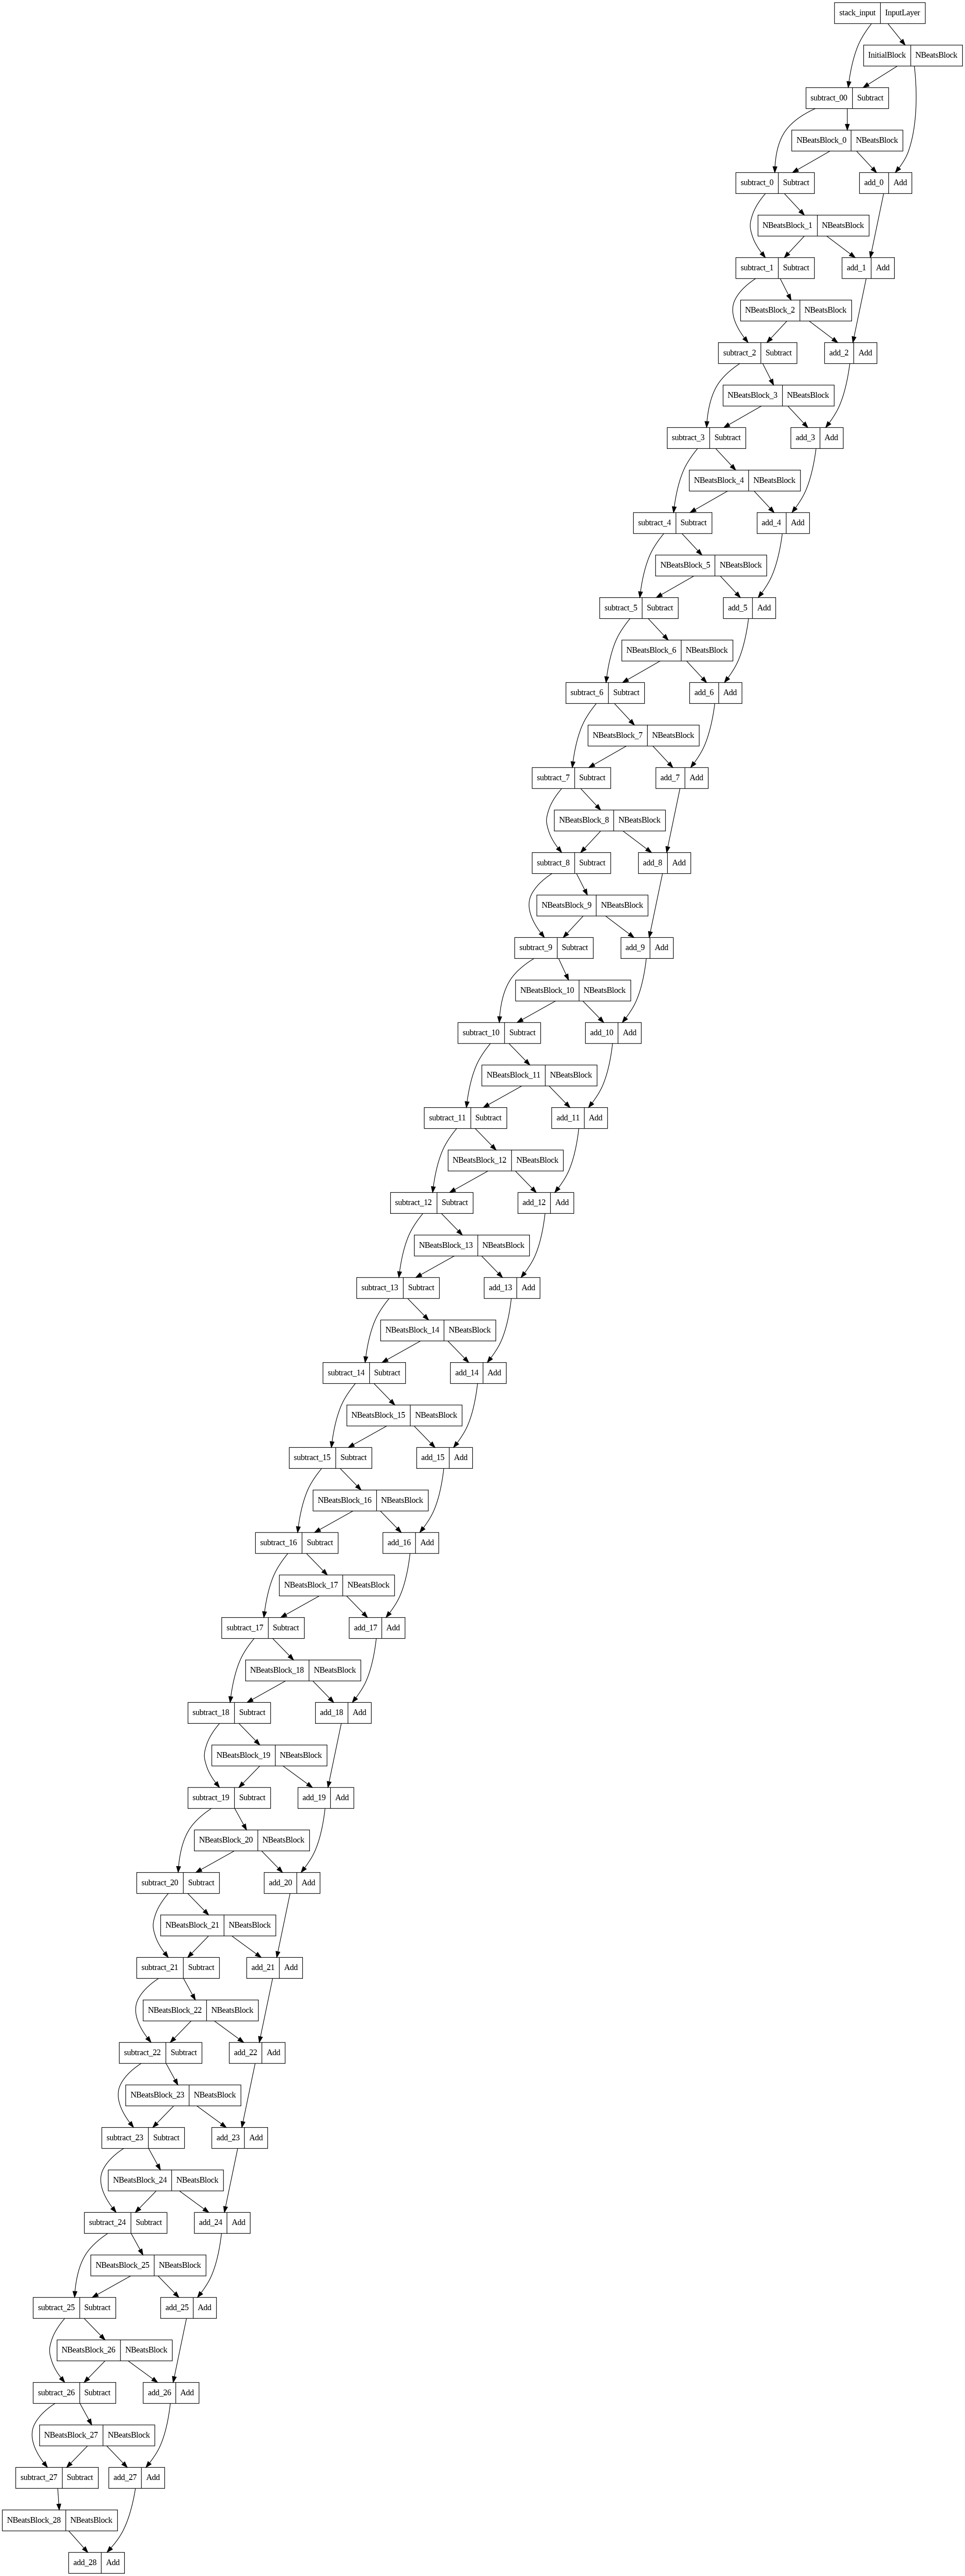

In [104]:
# Plot the N-BEATS model and inspect the architecture
from tensorflow.keras.utils import plot_model
plot_model(model_7)

# 8. Model 8: Ensemble

Using randomly initialised models with different loss functions (MAE, MSE, MAPE). Different model architectures could be used and averege their results.

The same model is used, but the random initialisation of the models makes each model unique. Each model is run for 1000 epochs for 5 iterations on each of the loss functions (15 models in total).

The models are 2 simple dense layers with relu activation.

In [105]:
def get_ensemble_models(horizon=HORIZON,
                        train_data=train_dataset,
                        test_data=test_dataset,
                        num_iter=10,
                        num_epochs=100,
                        loss_fns=['mae', 'mse', 'mape']):
  """
  Returns a list of num_iter models each trained on MAE, MSE and MAPE loss.

  For example, if num_iter=10, a list of 30 trained models will be returned:
  10 * len(["mae", "mse", "mape"]).
  """
  # Make empty list for trained ensemble models
  ensemble_models = []

  # Create num_iter number of models per loss function
  for i in range(num_iter):
    # Build and fit a new model with a different loss function
    for loss_function in loss_fns:
      print(f"Optimizing model by reducing: {loss_function} for {num_epochs} epochs, model number: {i}")

      # Construct a simple model (similar to model_1)
      model = tf.keras.Sequential([
        # Initialize layers with normal (Gaussian) distribution so we can use the models for prediction
        # interval estimation later: https://www.tensorflow.org/api_docs/python/tf/keras/initializers/HeNormal
        layers.Dense(128, kernel_initializer='he_normal', activation='relu'),
        layers.Dense(128, kernel_initializer='he_normal', activation='relu'),
        layers.Dense(HORIZON)
      ])

      # Compile simple model with current loss function
      model.compile(loss=loss_function,
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=['mae', 'mse'])

      # Fit model
      model.fit(train_data,
                epochs=num_epochs,
                verbose=0,
                validation_data=test_data,
                # Add callbacks to prevent training from going/stalling for too long
                callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                            patience=200,
                                                            restore_best_weights=True),
                           tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                                patience=100,
                                                                verbose=1)])

      # Adppend fitted model to list of ensemble models
      ensemble_models.append(model)

  return ensemble_models # return list of trained models

In [106]:
%%time
# Get list of trained ensemble models
ensemble_models = get_ensemble_models(num_iter=5,
                                      num_epochs=1000)

Optimizing model by reducing: mae for 1000 epochs, model number: 0

Epoch 288: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Optimizing model by reducing: mse for 1000 epochs, model number: 0

Epoch 276: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 552: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 652: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
Optimizing model by reducing: mape for 1000 epochs, model number: 0

Epoch 222: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 322: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing: mae for 1000 epochs, model number: 1

Epoch 389: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Optimizing model by reducing: mse for 1000 epochs, model number: 1

Epoch 341: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 441: ReduceLROnPl

In [107]:
# Create a function which uses a list of trained models to make and return a list of predictions
def make_ensemble_preds(ensemble_models, data):
  ensemble_preds = []
  for model in ensemble_models:
    preds = model.predict(data) # make predictions with current ensemble mdoel
    ensemble_preds.append(preds)
  return tf.constant(tf.squeeze(ensemble_preds))

In [108]:
# Create a list of ensemble predictions
ensemble_preds = make_ensemble_preds(ensemble_models=ensemble_models,
                                     data=test_dataset)
ensemble_preds

1/1 [==============================] - 0s 38ms/step


1/1 [==============================] - 0s 39ms/step


1/1 [==============================] - 0s 64ms/step


<tf.Tensor: shape=(15, 708), dtype=float32, numpy=
array([[34005.027, 34133.316, 33916.934, ..., 25868.125, 25970.002,
        25831.625],
       [34016.754, 33873.34 , 33816.86 , ..., 25847.941, 25990.555,
        25767.379],
       [33959.375, 34052.184, 33851.836, ..., 25770.135, 25963.703,
        25824.29 ],
       ...,
       [34090.203, 33899.3  , 33897.137, ..., 25822.771, 25904.393,
        25858.654],
       [33796.887, 33989.547, 33771.34 , ..., 25700.719, 25865.312,
        25769.63 ],
       [33770.707, 33868.445, 33701.367, ..., 25657.121, 26000.613,
        25754.963]], dtype=float32)>

In [109]:
# Evaluate ensemble model(s) predictions
ensemble_results = evaluate_preds(y_true=y_test,
                                  y_pred=np.median(ensemble_preds, axis=0)) # take the median across all ensemble predictions
ensemble_results

{'mae': 774.4727,
 'mse': 1387147.2,
 'rmse': 1177.7721,
 'mape': 2.2800272,
 'mase': 1.0080116}

## Prediction Intervals

Using the Bootstrap method for 95% confidence prediction intervals:

1. Take the predictions from a number of randomly initialised models
2. Measure the standard deviation of the predictions
3. Multiple by 1.96 (assuming a Gaussian distribution, 95% of observations fall within 1.96 standard deviations of the mean) - why the models in model_8 were initialised with normal distributions
4. To get the perdiction interval upper and lower bounds, add/subtract the value obtained in (3) to the mean/median of the predictions made in (1)

In [110]:
# Find upper and lower bounds of ensemble predictions
def get_upper_lower(preds): # 1. Take the predictions of multiple randomly initialized deep learning neural networks

  # 2. Measure the standard deviation of the predictions
  std = tf.math.reduce_std(preds, axis=0)

  # 3. Multiply the standard deviation by 1.96
  interval = 1.96 * std # https://en.wikipedia.org/wiki/1.96

  # 4. Get the prediction interval upper and lower bounds
  preds_mean = tf.reduce_mean(preds, axis=0)
  lower, upper = preds_mean - interval, preds_mean + interval
  return lower, upper

# Get the upper and lower bounds of the 95%
lower, upper = get_upper_lower(preds=ensemble_preds)

Plotting against the ensemble model's predictions

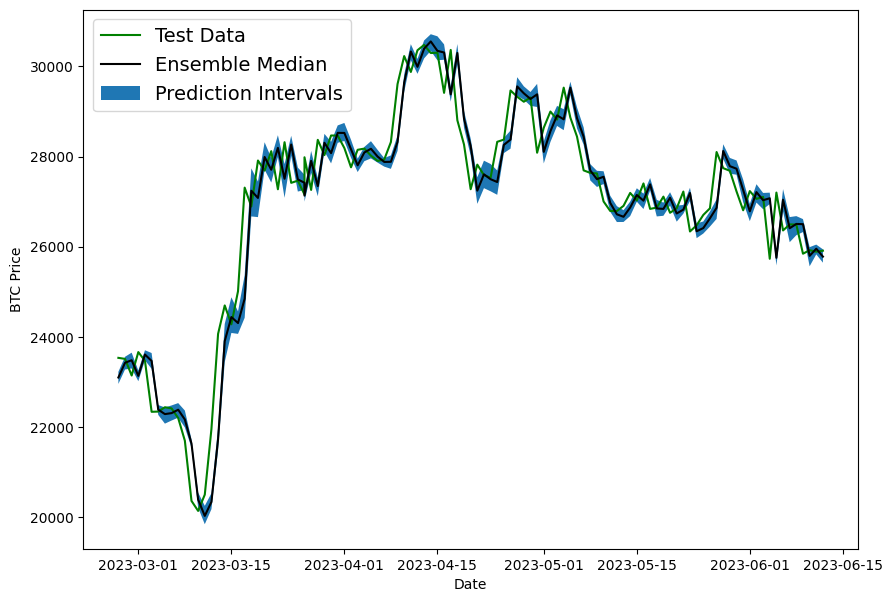

In [117]:
# Get the median values of our ensemble preds
ensemble_median = np.median(ensemble_preds, axis=0)

# Plot the median of our ensemble preds along with the prediction intervals (where the predictions fall between)
offset=600
plt.figure(figsize=(10, 7))
plt.plot(X_test.index[offset:], y_test[offset:], "g", label="Test Data")
plt.plot(X_test.index[offset:], ensemble_median[offset:], "k-", label="Ensemble Median")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.fill_between(X_test.index[offset:],
                 (lower)[offset:],
                 (upper)[offset:], label="Prediction Intervals")
plt.legend(loc="upper left", fontsize=14);

Ensemble model predictions lag behind the actual data

Predictions are low throughout

Both indicate the model is overfitting the data
* replicating what a naive model would do (predicting the previous time step value for the next value)

# Model result comparisons

In [113]:
all_model_results = pd.DataFrame({'naive': naive_results,
                                  'horizon_1_window_7': model_1_results,
                                  'horizon_1_window_30': model_2_results,
                                  'horizon_7_window_30': model_3_results,
                                  'Conv1D' : model_4_results,
                                  'LSTM': model_5_results,
                                  'Multivariate_H1W7': model_6_results,
                                  'N-BEATS': model_7_results,
                                  'Ensemble_random_init': ensemble_results})
all_model_results = all_model_results.transpose()
all_model_results

,mae,mse,rmse,mape,mase
naive,767.571411,1358397.375,1165.503052,2.260695,0.999029
horizon_1_window_7,785.100098,1419880.375,1191.587280,2.310781,1.021844
horizon_1_window_30,838.499268,1592325.500,1261.873779,2.462702,1.090281
horizon_7_window_30,1616.129395,5707828.500,1855.874146,4.828107,2.094857
Conv1D,788.155029,1449151.500,1203.807007,2.326982,1.025820
LSTM,813.745911,1504959.500,1226.767944,2.403023,1.059127
Multivariate_H1W7,770.834290,1380126.000,1174.787598,2.272198,1.003276
N-BEATS,800.992249,1477230.625,1215.413696,2.371772,1.042528
Ensemble_random_init,774.472717,1387147.250,1177.772095,2.280027,1.008012


In [122]:
all_model_results_mae = pd.DataFrame({'naive': naive_results['mae'],
                                      'horizon_1_window_7': model_1_results['mae'],
                                      'horizon_1_window_30': model_2_results['mae'],
                                      'horizon_7_window_30': model_3_results['mae'],
                                      'Conv1D' : model_4_results['mae'],
                                      'LSTM': model_5_results['mae'],
                                      'Multivariate_H1W7': model_6_results['mae'],
                                      'N-BEATS': model_7_results['mae'],
                                      'Ensemble_random_init': ensemble_results['mae']},
                                      index=['mae'])
all_model_results_mae = all_model_results_mae.transpose()
all_model_results_mae

,mae
naive,767.571411
horizon_1_window_7,785.100098
horizon_1_window_30,838.499268
horizon_7_window_30,1616.129395
Conv1D,788.155029
LSTM,813.745911
Multivariate_H1W7,770.834290
N-BEATS,800.992249
Ensemble_random_init,774.472717


<Axes: >

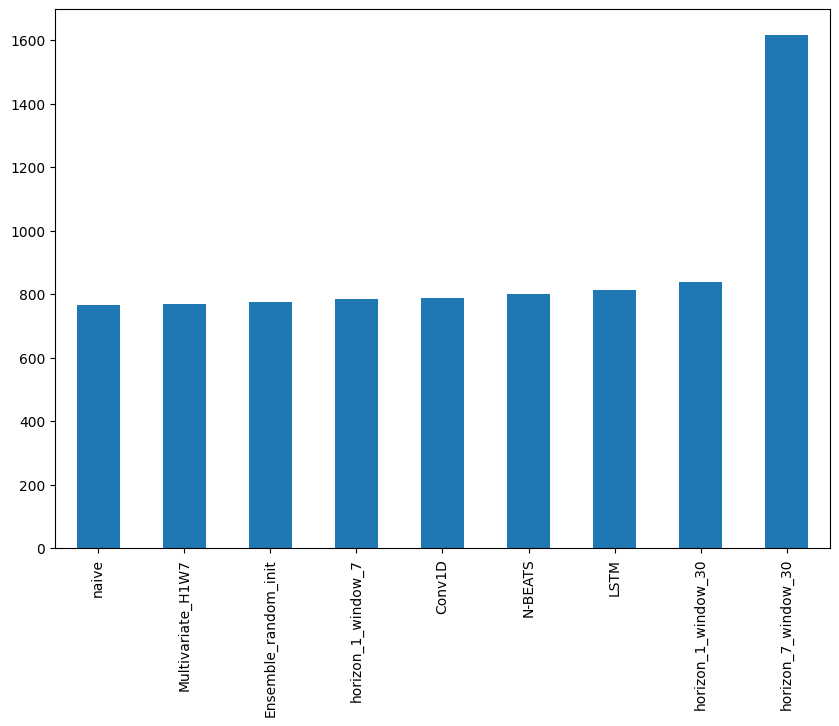

In [124]:
# Sort model and plot
all_model_results_mae.sort_values('mae', ascending=True)['mae'].plot(kind='bar', figsize=(10, 7))

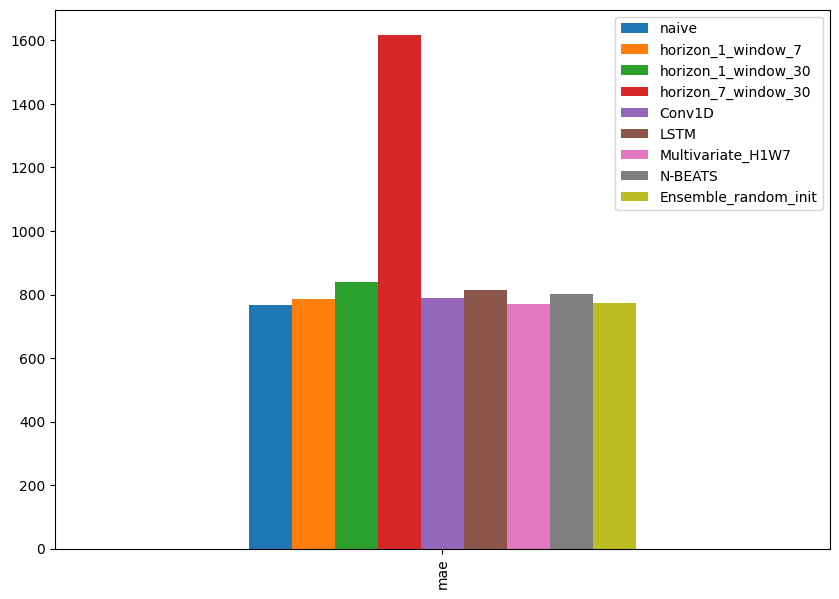

In [125]:
all_model_results_mae = pd.DataFrame({'naive': naive_results['mae'],
                                      'horizon_1_window_7': model_1_results['mae'],
                                      'horizon_1_window_30': model_2_results['mae'],
                                      'horizon_7_window_30': model_3_results['mae'],
                                      'Conv1D' : model_4_results['mae'],
                                      'LSTM': model_5_results['mae'],
                                      'Multivariate_H1W7': model_6_results['mae'],
                                      'N-BEATS': model_7_results['mae'],
                                      'Ensemble_random_init': ensemble_results['mae']},
                                      index=['mae']).plot(figsize=(10, 7), kind='bar')

# Making forecast predictions on full dataset

Previously split the dataset into training and test sets to evaluate how each model did on pseudo-future data (test set).

Will be using the full dataset with no test set.


## Dataset creation & modelling

In [129]:
bitcoin_prices_windowed.head()

,Price (USD),block_reward,Price (USD)+1,Price (USD)+2,Price (USD)+3,Price (USD)+4,Price (USD)+5,Price (USD)+6,Price (USD)+7
Date,,,,,,,,,
2013-09-30,132.18,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-01,114.13,25,132.18,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,123.63,25,114.13,132.18,NaN,NaN,NaN,NaN,NaN
2013-10-03,129.01,25,123.63,114.13,132.18,NaN,NaN,NaN,NaN
2013-10-04,128.55,25,129.01,123.63,114.13,132.18,NaN,NaN,NaN


In [131]:
# Train model on entire data to make prediction for the next day
X_all = bitcoin_prices_windowed.drop(["Price (USD)", "block_reward"], axis=1).dropna().to_numpy() # only want prices, our future model can be a univariate model
y_all = bitcoin_prices_windowed.dropna()["Price (USD)"].to_numpy()

In [132]:
# 1. Turn X and y into tensor Datasets
features_dataset_all = tf.data.Dataset.from_tensor_slices(X_all)
labels_dataset_all = tf.data.Dataset.from_tensor_slices(y_all)

# 2. Combine features & labels
dataset_all = tf.data.Dataset.zip((features_dataset_all, labels_dataset_all))

# 3. Batch and prefetch for optimal performance
BATCH_SIZE = 1024 # taken from Appendix D in N-BEATS paper
dataset_all = dataset_all.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

dataset_all

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>

In [133]:
tf.random.set_seed(42)

# Create model
model_9 = tf.keras.Sequential([
    layers.Dense(128, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(HORIZON)
])

# Compile
model_9.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam())

# Fit model on all data to make future forecasts
model_9.fit(dataset_all,
            epochs=100,
            verbose=0)

## Forecasting

In [154]:
# How many timesteps to predict into the future?
INTO_FUTURE = 14 # since our Bitcoin data is daily, this is for 14 days

In [155]:
# 1. Create function to make predictions into the future
def make_future_forecast(values, model, into_future, window_size=WINDOW_SIZE) -> list:
  """
  Makes future forecasts into_future steps after values ends.

  Returns future forecasts as list of floats.
  """
  # 2. Make an empty list for future forecasts/prepare data to forecast on
  future_forecast = []
  last_window = values[-WINDOW_SIZE:] # only want preds from the last window (this will get updated)

  # 3. Make INTO_FUTURE number of predictions, altering the data which gets predicted on each time
  for _ in range(into_future):

    # Predict on last window then append it again, again, again (model starts to make forecasts on its own forecasts)
    future_pred = model.predict(tf.expand_dims(last_window, axis=0))
    print(f'Predicting on: \n {last_window} -> Prediction: {tf.squeeze(future_pred).numpy()}\n')

    # Append predictions to future_forecast
    future_forecast.append(tf.squeeze(future_pred).numpy())
    # print(future_forecast)

    # Update last window with new pred and get WINDOW_SIZE most recent preds (model was trained on WINDOW_SIZE windows)
    last_window = np.append(last_window, future_pred)[-WINDOW_SIZE:]

  return future_forecast

In [156]:
# Make forecasts into future of the price of Bitcoin
# Note: if you're reading this at a later date, you may already be in the future, so the forecasts
# we're making may not actually be forecasts, if that's the case, readjust the training data.
future_forecast = make_future_forecast(values=y_all,
                                       model=model_9,
                                       into_future=INTO_FUTURE,
                                       window_size=WINDOW_SIZE)

1/1 [==============================] - 0s 23ms/step
Predicting on: 
 [26359.59 26493.46 26489.46 25842.84 25920.86 25887.59 25910.03] -> Prediction: 26573.552734375

1/1 [==============================] - 0s 20ms/step
Predicting on: 
 [26493.46       26489.46       25842.84       25920.86
 25887.59       25910.03       26573.55273438] -> Prediction: 26584.169921875

1/1 [==============================] - 0s 21ms/step
Predicting on: 
 [26489.46       25842.84       25920.86       25887.59
 25910.03       26573.55273438 26584.16992188] -> Prediction: 26255.501953125

1/1 [==============================] - 0s 19ms/step
Predicting on: 
 [25842.84       25920.86       25887.59       25910.03
 26573.55273438 26584.16992188 26255.50195312] -> Prediction: 26022.326171875

1/1 [==============================] - 0s 21ms/step
Predicting on: 
 [25920.86       25887.59       25910.03       26573.55273438
 26584.16992188 26255.50195312 26022.32617188] -> Prediction: 26108.857421875

1/1 [===========

In [157]:
future_forecast[:10]

[26573.553,
 26584.17,
 26255.502,
 26022.326,
 26108.857,
 26144.193,
 26391.375,
 26695.537,
 26524.701,
 26267.094]

In [158]:
def get_future_dates(start_date, into_future, offset=1):
  """
  Returns array of datetime values from ranging from start_date to start_date+horizon.

  start_date: date to start range (np.datetime64)
  into_future: number of days to add onto start date for range (int)
  offset: number of days to offset start_date by (default 1)
  """
  start_date = start_date + np.timedelta64(offset, "D") # specify start date, "D" stands for day
  end_date = start_date + np.timedelta64(into_future, "D") # specify end date
  return np.arange(start_date, end_date, dtype="datetime64[D]") # return a date range between start date and end date

In [159]:
# Last timestep of timesteps (currently in np.datetime64 format)
last_timestep = bitcoin_prices.index[-1]
last_timestep

Timestamp('2023-06-12 00:00:00')

In [160]:
# Get next two weeks of timesteps
next_time_steps = get_future_dates(start_date=last_timestep,
                                   into_future=INTO_FUTURE)
next_time_steps

array(['2023-06-13', '2023-06-14', '2023-06-15', '2023-06-16',
       '2023-06-17', '2023-06-18', '2023-06-19', '2023-06-20',
       '2023-06-21', '2023-06-22', '2023-06-23', '2023-06-24',
       '2023-06-25', '2023-06-26'], dtype='datetime64[D]')

In [161]:
# Insert last timestep/final price so the graph doesn't look messed
next_time_steps = np.insert(next_time_steps, 0, last_timestep)
future_forecast = np.insert(future_forecast, 0, prices[-1])
next_time_steps, future_forecast

(array(['2023-06-12', '2023-06-13', '2023-06-14', '2023-06-15',
        '2023-06-16', '2023-06-17', '2023-06-18', '2023-06-19',
        '2023-06-20', '2023-06-21', '2023-06-22', '2023-06-23',
        '2023-06-24', '2023-06-25', '2023-06-26'], dtype='datetime64[D]'),
 array([25910.03 , 26573.553, 26584.17 , 26255.502, 26022.326, 26108.857,
        26144.193, 26391.375, 26695.537, 26524.701, 26267.094, 26242.213,
        26339.613, 26456.8  , 26669.959], dtype=float32))

In [162]:
len(next_time_steps), len(future_forecast)

(15, 15)

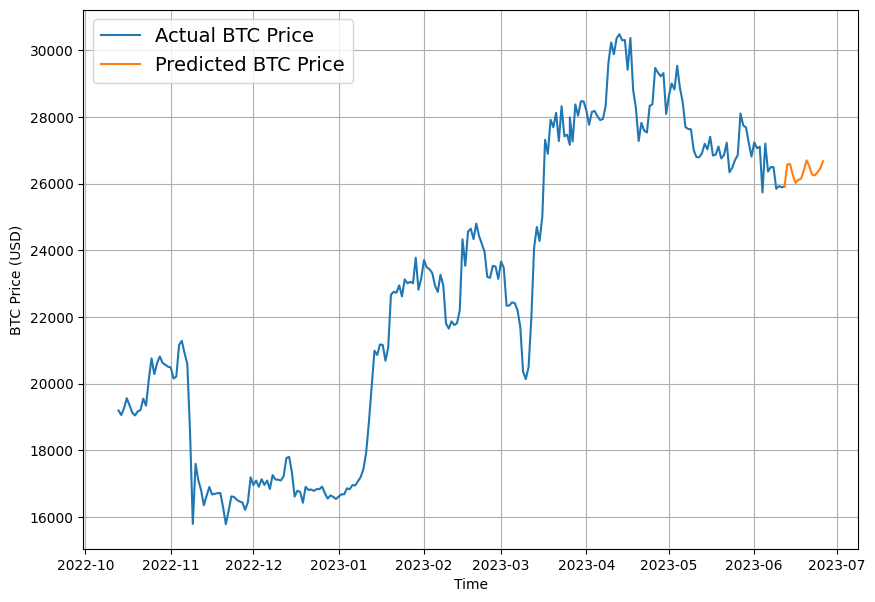

In [168]:
# Plot future price predictions of Bitcoin
plt.figure(figsize=(10, 7))
plot_time_series(bitcoin_prices.index, prices, start=3300, format="-", label="Actual BTC Price")
plot_time_series(next_time_steps, future_forecast, format="-", label="Predicted BTC Price")

The `model_9` predictions are quite cyclic up and down

This could be due to model overfitting and not generalising well for future data